In [1]:
!pip install geopandas
!pip install hyperopt

In [82]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve
import matplotlib.patches as mpatches

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from dython.nominal import associations
from mpl_toolkits.axes_grid1 import make_axes_locatable


import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK

In [3]:
## converting raw xpt file to csv file for analysis using r package
# options(stringsAsFactors=F, scipen = 999)

# pkg = 'Hmisc'
# install.packages(pkg)
# library(pkg, character.only == TRUE)


# brfss <- sasxport.get("/content/LLCP2022.XPT ")
# write.csv(brfss, file = "brfss2022.csv")

In [4]:
deaf_or_blind = {
    1: 'Yes',
    2: 'No',
    7: 'Not_Sure',
    9: 'Refused',

}

general_health = {
    1: 'Excellent',
    2: 'Very good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor',
    7: 'Not_Sure',
    9: 'Refused',
}
physical_health = {
    88: 0,
    77: np.nan,
    99: np.nan

}

insurance_plan = {
    1: 'employer',
    2: 'private',
    3: 'Medicare',
    4: 'Medigap',
    5: 'Medicaid',
    6: 'Children´s Health Insurance Program (CHIP)',
    7: 'Military related health care: TRICARE (CHAMPUS) / VA health care / CHAMP- VA',
    8: 'Indian Health Service',
    9: 'State sponsored health plan',
    10: 'Other government program',
    88: 'No coverage of any type',
    77: 'Not_Sure',
    99: 'Refused',
}

health_care_access = {
    1: 'couldnot_afford',
    2: 'can_afford',
    7: 'Not_Sure',
    9: 'Refused'
}

diabetic = {
    1: 'Yes',
    2: 'Yes_during_pregnancy',
    3: 'No',
    4: 'pre_diabetes_or_boderline',
    7: 'Not_Sure',
    9: 'Refused',
}

martial_status = {
    1: 'Married',
    2: 'Divorced',
    3: 'Widowed',
    4: 'Separated',
    5: 'Never_married',
    6: 'Member_of_unmarried_couple',
    9: 'Refused',
}

last_visited_doctor = {
    1: '1 y',
    2: '1 & 2 y',
    3: '2 & 5 y',
    4: '5',
    7: 'Not_Sure',
    8: 'Never',
    9: 'Refused'
}

Exercise_done_in_last_month = {
    1.0: 'Yes',
    2.0: 'No',
    7.0: 'Not_Sure',
    9.0: 'Refused'
}



value_employ = {
    1.0: 'Employed for wages',
    2.0: 'Self-employed',
    3.0: 'Out of work for 1 year or more',
    4.0: 'Out of work for less than 1 year',
    5.0: 'A homemaker',
    6.0: 'A student',
    7.0: 'Retired',
    8.0: 'Unable to work',
    9.0: 'Refused',
    
}


value_income = {
    1.0: 'Less than 10,000',
    2.0: '10,000_to_15,000',
    3.0: '15,000_to_20,000',
    4.0: '20,000_to_25,000',
    5.0: '25,000_to_35,000',
    6.0: '35,000_to_50,000',
    7.0: '50,000_to_75,000',
    8.0: '75,000_to_100,000',
    9.0: '100,000_to_150,000',
    10.0: '150,000_to_200,000',
    11.0: '200,000_or_more',
    77.0: 'Not_sure',
    99.0: 'Refused',
}


value_pregnant = {
    1.0: 'Yes',
    2.0: 'No',
    7.0: 'Not_Sure',
    9.0: 'Refused'
}

data_mapping = {
    1: 'Alabama',
    2: 'Alaska',
    4: 'Arizona',
    5: 'Arkansas',
    6: 'California',
    8: 'Colorado',
    9: 'Connecticut',
    10: 'Delaware',
    11: 'District of Columbia',
    12: 'Florida',
    13: 'Georgia',
    15: 'Hawaii',
    16: 'Idaho',
    17: 'Illinois',
    18: 'Indiana',
    19: 'Iowa',
    20: 'Kansas',
    21: 'Kentucky',
    22: 'Louisiana',
    23: 'Maine',
    24: 'Maryland',
    25: 'Massachusetts',
    26: 'Michigan',
    27: 'Minnesota',
    28: 'Mississippi',
    29: 'Missouri',
    30: 'Montana',
    31: 'Nebraska',
    32: 'Nevada',
    33: 'New Hampshire',
    34: 'New Jersey',
    35: 'New Mexico',
    36: 'New York',
    37: 'North Carolina',
    38: 'North Dakota',
    39: 'Ohio',
    40: 'Oklahoma',
    41: 'Oregon',
    42: 'Pennsylvania',
    44: 'Rhode Island',
    45: 'South Carolina',
    46: 'South Dakota',
    47: 'Tennessee',
    48: 'Texas',
    49: 'Utah',
    50: 'Vermont',
    51: 'Virginia',
    53: 'Washington',
    54: 'West Virginia',
    55: 'Wisconsin',
    56: 'Wyoming',
    66: 'Guam',
    72: 'Puerto Rico',
    78: 'Virgin Islands'
}

value_smoking = {
    1.0: 'Every day',
    2.0: 'Some days',
    3.0: 'Not at all',
    7.0: 'Not_Sure',
    9.0: 'Refused'
}

value_race = {
    1: 'White, Non-Hispanic',
    2: 'Black, Non-Hispanic',
    3: 'Asian, Non-Hispanic',
    4: 'American Indian or Alaskan Native Non Hispanic',
    5: 'Hispanic',
    6: 'Other race, Non-Hispanic'
}

column_mapping = {
    1: '18 to 24',
    2: '25 to 29',
    3: '30 to 34',
    4: '35 to 39',
    5: '40 to 44',
    6: '45 to 49',
    7: '50 to 54',
    8: '55 to 59',
    9: '60 to 64',
    10: '65 to 69',
    11: '70 to 74',
    12: '75 to 79',
    13: '80 or older',
    14: 'Refused'
}
Had_heartstroke = {
    1: 'Yes',
    2: 'No',
    7: 'Not_Sure',
    9: 'Refused'
}
Teeth_removed = {
    1: '1 to 5',
    2: '6 to all',
    3: 'All',
    7: 'Not_Sure',
    8: 'None',
    9: 'Refused'
}
had_asthma = {
    1: 'Yes',
    2: 'No',
    7: 'Not_Sure',
    9: 'Refused'
}
melanoma_or_any_other_cancer = {
    1: 'Yes',
    2: 'No',
    7: 'Not_Sure',
    9: 'Refused'
}
had_depressive_disorder = {
    1: 'Yes',
    2: 'No',
    7: 'Not_Sure',
    9: 'Refused'
}

transformed_cols = [
    'height',
    'weight',
    'BMI',
    'sleeping_time',
    'Had_heartstroke',
    'Teeth_removed',
    'had_asthma',
    'melanoma_or_any_other_cancer',
    'had_depressive_disorder',
    'Sex',
    'Age_Group',
    'Language',
    'State',
    'Employed',
    'Income',
    'pregnant',
    'smoking',
    'Race',
    'deaf',
    'blind',
    'diffwalk',
    'diffconcentrating',
    'general_health',
    '#physhlth_notgood',
    '#menthlth_notgood',
    'insurance_plan',
    'health_care_access',
    'diabetic',
    'martial_status',
    'last_visited_doctor',
    'Exercise_done_in_last_month'
]

selected_columns = [
    'height3', 'weight2', 'deaf', 'blind', 'diffwalk', 'decide', 'sexvar', 'genhlth',
    'physhlth', 'menthlth', 'priminsr', 'medcost1', 'checkup1', 'exerany2', 'sleptim1',
    'cvdstrk3', 'rmvteth4', 'asthma3', 'chcocnc1', 'addepev3', 'diabete4', 'marital',
    'employ1', 'income3', 'pregnant', 'x.state', 'smokday2', 'x.imprace', 'qstlang', 'x.sex',
    'x.ageg5yr'
]

In [55]:
# importing the raw survey data in csv format
collected_data = pd.read_csv('brfss2022.csv', encoding='cp1252')

In [56]:
collected_data.shape

(445132, 327)

In [57]:
collected_data.columns.values

array(['Unnamed: 0', 'x.state', 'fmonth', 'idate', 'imonth', 'iday',
       'iyear', 'dispcode', 'seqno', 'x.psu', 'ctelenm1', 'pvtresd1',
       'colghous', 'statere1', 'celphon1', 'ladult1', 'colgsex1',
       'numadult', 'landsex1', 'nummen', 'numwomen', 'respslct',
       'safetime', 'ctelnum1', 'cellfon5', 'cadult1', 'cellsex1',
       'pvtresd3', 'cclghous', 'cstate1', 'landline', 'hhadult', 'sexvar',
       'genhlth', 'physhlth', 'menthlth', 'poorhlth', 'priminsr',
       'persdoc3', 'medcost1', 'checkup1', 'exerany2', 'sleptim1',
       'lastden4', 'rmvteth4', 'cvdinfr4', 'cvdcrhd4', 'cvdstrk3',
       'asthma3', 'asthnow', 'chcscnc1', 'chcocnc1', 'chccopd3',
       'addepev3', 'chckdny2', 'havarth4', 'diabete4', 'diabage4',
       'marital', 'educa', 'renthom1', 'numhhol4', 'numphon4', 'cpdemo1c',
       'veteran3', 'employ1', 'children', 'income3', 'pregnant',
       'weight2', 'height3', 'deaf', 'blind', 'decide', 'diffwalk',
       'diffdres', 'diffalon', 'hadmam', 'howlong

In [58]:
#looking at the unique values and distribution of values of each column in the survey data.
for i in collected_data.columns:
    print('unique values for '+i ,collected_data[i].unique())
    print('distribution of values in '+i, collected_data[i].value_counts())

unique values for Unnamed: 0 [     1      2      3 ... 445130 445131 445132]
distribution of values in Unnamed: 0 Unnamed: 0
1         1
296751    1
296762    1
296761    1
296760    1
         ..
148375    1
148374    1
148373    1
148372    1
445132    1
Name: count, Length: 445132, dtype: int64
unique values for x.state [ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50 51 53
 54 55 56 66 72 78]
distribution of values in x.state x.state
53    26152
36    17800
27    16821
39    16487
24    16418
48    14245
12    13393
55    11276
20    11247
25    11029
6     10952
23    10646
18    10466
51    10417
4     10185
26    10058
45    10037
49     9826
9      9784
8      9365
13     9236
19     8949
50     8811
34     8209
15     7747
31     7473
29     7438
46     7424
30     7048
33     6757
16     6280
44     5893
2      5865
40     5775
41     5756
22     5629
72     5509
5      5309
47     5266

unique values for numhhol4 [ 1.  2.  9. nan  7.]
distribution of values in numhhol4 numhhol4
2.0    88512
1.0     6943
9.0      447
7.0      147
Name: count, dtype: int64
unique values for numphon4 [ 1.  2. nan  3.  4.  6.  9.  7.  8.  5.]
distribution of values in numphon4 numphon4
1.0    3770
2.0    2277
3.0     411
9.0     133
7.0     126
4.0      94
8.0      67
6.0      40
5.0      25
Name: count, dtype: int64
unique values for cpdemo1c [ 2.  1.  8.  9.  3.  4.  7.  6. nan  5.]
distribution of values in cpdemo1c cpdemo1c
1.0    391754
2.0     28165
8.0     12706
9.0      4410
3.0      2958
4.0      1042
7.0       513
5.0       396
6.0       361
Name: count, dtype: int64
unique values for veteran3 [ 2.  1. nan  9.  7.]
distribution of values in veteran3 veteran3
2.0    386272
1.0     53211
9.0      1268
7.0       208
Name: count, dtype: int64
unique values for employ1 [ 7.  2.  5.  1.  8.  4.  3.  9.  6. nan]
distribution of values in employ1 employ1
1.0    186004
7.0    137083
2.0 

distribution of values in alcday4 alcday4
888.0    187667
201.0     31355
202.0     24184
101.0     19043
102.0     15797
230.0     15325
203.0     14215
103.0     11800
204.0     10933
205.0     10305
210.0      7010
220.0      6436
215.0      6016
104.0      5987
107.0      5880
105.0      5765
206.0      3943
777.0      3447
208.0      3137
225.0      3087
207.0      2764
999.0      2364
106.0      1875
212.0      1809
228.0       934
214.0       636
229.0       369
209.0       292
227.0       291
216.0       291
218.0       235
224.0       214
221.0       205
226.0       187
222.0       158
217.0       110
223.0       109
213.0        91
211.0        78
219.0        21
130.0         2
115.0         1
150.0         1
Name: count, dtype: int64
unique values for avedrnk3 [nan  2.  1.  4. 77.  5.  3. 88.  6. 12. 14.  8. 10. 15.  7.  9. 20. 35.
 18. 99. 21. 24. 76. 30. 50. 16. 25. 13. 11. 40. 69. 17. 26. 68. 22. 66.
 32. 73. 27. 33. 72. 19. 23. 60. 45. 28. 70. 58. 34. 65. 48. 31. 55. 46

unique values for aceprisn [nan  2.  1.  9.  7.]
distribution of values in aceprisn aceprisn
2.0    43701
1.0     3549
9.0      766
7.0      178
Name: count, dtype: int64
unique values for acedivrc [nan  2.  1.  7.  9.  8.]
distribution of values in acedivrc acedivrc
2.0    34367
1.0    12107
9.0      797
8.0      632
7.0      269
Name: count, dtype: int64
unique values for acepunch [nan  1.  3.  2.  9.  7.]
distribution of values in acepunch acepunch
1.0    38842
3.0     5816
2.0     1795
9.0     1004
7.0      672
Name: count, dtype: int64
unique values for acehurt1 [nan  1.  3.  2.  9.  7.]
distribution of values in acehurt1 acehurt1
1.0    35092
3.0     8628
2.0     2939
9.0     1068
7.0      350
Name: count, dtype: int64
unique values for aceswear [nan  1.  7.  3.  2.  9.]
distribution of values in aceswear aceswear
1.0    30266
3.0    13722
2.0     2393
9.0     1075
7.0      573
Name: count, dtype: int64
unique values for acetouch [nan  1.  2.  3.  9.  7.]
distribution of values i

unique values for x.dualcor [0.52038282        nan 0.47961718 0.33135524 0.66864476 0.5274272
 0.4725728  0.5281577  0.4718423  0.21582518 0.78417482 0.16486632
 0.83513368 0.19387028 0.80612972 0.35581412 0.64418588 0.43035956
 0.56964044 0.51205725 0.48794275 0.60855701 0.39144299 0.34066016
 0.65933984 0.3369039  0.6630961  0.20278061 0.79721939 0.26569146
 0.73430854 0.35214581 0.64785419 0.53578466 0.46421534 0.43383281
 0.56616719 0.41937566 0.58062434 0.59761232 0.40238768 0.3635108
 0.6364892  0.25219297 0.74780703 0.49098914 0.50901086 0.24892468
 0.75107532 0.28061191 0.71938809 0.48446573 0.51553427 0.41436939
 0.58563061 0.63307844 0.36692156 0.43810633 0.56189367 0.6211766
 0.3788234  0.16910598 0.83089402 0.53122932 0.46877068 0.31571376
 0.68428624 0.20096422 0.79903578 0.45974657 0.54025343 0.43506677
 0.56493323 0.50398896 0.49601104 0.22122268 0.77877732 0.18536127
 0.81463873 0.3362107  0.6637893  0.46132275 0.53867725 0.7413297
 0.2586703  0.26809711 0.73190289 0.51

unique values for x.packday [  nan  0.1   1.75  0.25  1.    0.2   2.    0.5   0.75  0.15  1.5   3.
  0.3   0.4   0.35  0.9   5.25  0.6   1.25  0.05  0.45  2.5   4.95  0.8
  1.4   2.6   6.25  3.75  5.    0.65  3.85  4.    0.55  1.2   0.95  0.7
  0.85  2.75  7.65 15.    3.5   1.35  1.3   6.    1.15  1.85  2.85  1.95
  1.8   2.25  4.4   8.75  2.15  1.6   1.1   1.05  6.5   5.7   5.1   2.1
  2.4   3.6   4.2  10.25  4.5   8.    9.    2.8  12.    5.15  5.75  7.
 10.1   5.5  10.15  5.3   1.45  5.05  3.95  8.85  3.25 11.    9.5   5.6
  3.35 12.15 10.    2.7   2.95  3.8   2.35  1.65 11.5   2.55  2.65  2.9
 30.    3.9   2.3   1.55  1.9   3.05  3.45  3.1   2.2   3.2   3.7   1.7
  7.25  5.4   0.    5.9   2.05 10.65  3.3   6.15  4.15  4.25  5.35  3.15
 13.5  12.65 10.05 11.25  4.35]
distribution of values in x.packday x.packday
1.00     42344
0.50     33105
0.25     11559
0.75      9197
2.00      6820
         ...  
9.00         1
3.80         1
7.00         1
12.15        1
4.35         1
Name: cou

In [59]:
#filtering the data for selected columns
filt_data = collected_data[selected_columns]

In [60]:
# As we have height and weight in different metrics for instance height is entered in ft and inches for some records 
# while other records are measured in meters and centimeters, so bringing them to same platform.

filt_data['height'] = filt_data['height3'].astype(str).apply(lambda x: 0.0254*float(float(x[0])*12+float(x[1:])) if float(x)<=712
                                else( float(float(x[1])+float(x[2:])*0.01) if float(x)>=9000 and float(x)<9999 else np.nan))
filt_data['weight'] = filt_data['weight2'].astype(str).apply(lambda x: float(x) if float(x)<7777 else (float(x[1:])*2.2046 if float(x)>7777 and float(x)<9999 else np.nan))

filt_data['height'] = filt_data['height'].fillna(filt_data['height'].mean())
filt_data['weight'] = filt_data['weight'].fillna(filt_data['weight'].mean())
filt_data['BMI'] = filt_data['weight']/(filt_data['height']*filt_data['height'])
filt_data['BMI'] = filt_data['BMI'].fillna(filt_data['BMI'].mean())


/var/folders/hp/n92g34w508j_9d8zmklf0xjm0000gn/T/ipykernel_32347/3956223940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_data['height'] = filt_data['height3'].astype(str).apply(lambda x: 0.0254*float(float(x[0])*12+float(x[1:])) if float(x)<=712
/var/folders/hp/n92g34w508j_9d8zmklf0xjm0000gn/T/ipykernel_32347/3956223940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_data['weight'] = filt_data['weight2'].astype(str).apply(lambda x: float(x) if float(x)<7777 else (float(x[1:])*2.2046 if 

In [61]:
#looking at the distribution of the computed height column
filt_data['height'].describe()

count    445132.000000
mean          1.702647
std           0.103962
min           0.609600
25%           1.625600
50%           1.701800
75%           1.778000
max           7.520000
Name: height, dtype: float64

In [62]:
# As the input data is a survey collected from the people across states the entries as we have seen earlier are numbers
# and they doesnt tell us what exactly the value resembles inorder to understand the data better we mapped each column
# to its respective category using the codebook provided by the organisation.

filt_data['sleeping_time'] = filt_data["sleptim1"].replace({77:np.nan,99:np.nan})
filt_data['Had_heartstroke'] = filt_data['cvdstrk3'].replace(Had_heartstroke)
filt_data['Teeth_removed'] = filt_data['rmvteth4'].replace(Teeth_removed)
filt_data['had_asthma'] = filt_data['asthma3'].replace(had_asthma)
filt_data['melanoma_or_any_other_cancer'] = filt_data['chcocnc1'].replace(melanoma_or_any_other_cancer)
filt_data['had_depressive_disorder'] = filt_data['addepev3'].replace(had_depressive_disorder)





filt_data['Sex'] = filt_data['x.sex'].replace({1: 'male', 2: 'female'})
filt_data['Age_Group'] = filt_data['x.ageg5yr'].map(column_mapping)
filt_data['Language'] = filt_data['qstlang'].replace({1: 'English', 2: 'Spanish'})
filt_data['State'] = filt_data['x.state'].replace(data_mapping)
filt_data['Employed'] = filt_data['employ1'].replace(value_employ)
filt_data['Income'] = filt_data['income3'].replace(value_income)
filt_data['pregnant'] = filt_data['pregnant'].replace(value_pregnant)
filt_data['smoking'] = filt_data['smokday2'].replace(value_smoking)
filt_data['Race'] = filt_data['x.imprace'].replace(value_race)



filt_data['deaf'] = filt_data['deaf'].replace(deaf_or_blind)
filt_data['blind'] = filt_data['blind'].replace(deaf_or_blind)
filt_data['diffwalk'] = filt_data['diffwalk'].replace(deaf_or_blind)
filt_data['diffconcentrating'] = filt_data['decide'].replace(deaf_or_blind)
filt_data['general_health'] = filt_data['genhlth'].replace(general_health)
filt_data['#physhlth_notgood'] = filt_data['physhlth'].replace(physical_health)
filt_data['#menthlth_notgood'] = filt_data['menthlth'].replace(physical_health)
filt_data['insurance_plan'] = filt_data['priminsr'].replace(insurance_plan)
filt_data['health_care_access'] = filt_data['medcost1'].replace(health_care_access)
filt_data['diabetic'] = filt_data['diabete4'].replace(diabetic)
filt_data['martial_status'] = filt_data['marital'].replace(martial_status)

filt_data['last_visited_doctor'] = filt_data['checkup1'].replace(last_visited_doctor)
filt_data['Exercise_done_in_last_month'] = filt_data['exerany2'].replace(Exercise_done_in_last_month)





/var/folders/hp/n92g34w508j_9d8zmklf0xjm0000gn/T/ipykernel_32347/1446511680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_data['sleeping_time'] = filt_data["sleptim1"].replace({77:np.nan,99:np.nan})
/var/folders/hp/n92g34w508j_9d8zmklf0xjm0000gn/T/ipykernel_32347/1446511680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_data['Had_heartstroke'] = filt_data['cvdstrk3'].replace(Had_heartstroke)
/var/folders/hp/n92g34w508j_9d8zmklf0xjm0000gn/T/ipykernel_32347/1446511680.py:7: SettingWithCop

/var/folders/hp/n92g34w508j_9d8zmklf0xjm0000gn/T/ipykernel_32347/1446511680.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_data['diabetic'] = filt_data['diabete4'].replace(diabetic)
/var/folders/hp/n92g34w508j_9d8zmklf0xjm0000gn/T/ipykernel_32347/1446511680.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_data['martial_status'] = filt_data['marital'].replace(martial_status)
/var/folders/hp/n92g34w508j_9d8zmklf0xjm0000gn/T/ipykernel_32347/1446511680.py:40: SettingWithCopyWarning: 
A value

In [63]:
final_data = filt_data[transformed_cols]

In [64]:
final_data.head()

,height,weight,BMI,sleeping_time,Had_heartstroke,Teeth_removed,had_asthma,melanoma_or_any_other_cancer,had_depressive_disorder,Sex,...,diffconcentrating,general_health,#physhlth_notgood,#menthlth_notgood,insurance_plan,health_care_access,diabetic,martial_status,last_visited_doctor,Exercise_done_in_last_month
0,1.702647,183.18997,63.190591,8.0,No,NaN,No,No,No,female,...,No,Very good,0.0,0.0,Refused,can_afford,Yes,Married,1 y,No
1,1.600200,150.00000,58.579104,6.0,No,NaN,No,Yes,No,female,...,No,Excellent,0.0,0.0,Medicare,can_afford,No,Widowed,Never,No
2,1.574800,140.00000,56.451726,5.0,No,NaN,No,No,No,female,...,No,Very good,2.0,3.0,employer,can_afford,No,Married,1 y,Yes
3,1.651000,140.00000,51.361049,7.0,No,NaN,Yes,No,No,female,...,No,Excellent,0.0,0.0,Refused,can_afford,No,Married,1 y,Yes
4,1.574800,119.00000,47.983967,9.0,No,NaN,No,No,No,female,...,No,Fair,2.0,0.0,Military related health care: TRICARE (CHAMPUS...,can_afford,No,Married,1 y,Yes


In [65]:
for i in final_data.columns:
    print('unique values for '+i ,final_data[i].unique())
    print('distribution of values in '+i, final_data[i].value_counts())

unique values for height [1.70264708 1.6002     1.5748     1.651      1.8034     1.6256
 1.7018     1.6764     1.7272     1.5494     1.9304     1.8796
 1.778      1.8542     1.7526     1.524      1.8288     1.905
 1.9558     1.4986     1.4478     1.4224     1.2446     1.4732
 1.2192     1.9812     2.032      2.0066     1.2954     1.397
 1.3462     1.65       1.82       1.67       1.76       2.1082
 1.3716     1.64       1.75       1.83       1.8        1.71
 2.159      2.2606     0.9144     2.0574     1.143      1.52
 1.7        1.74       1.51       1.53       1.69       1.56
 1.84       1.9        1.6        1.54       1.72       1.87
 1.57       1.63       1.61       1.49       1.59       1.78
 1.4        1.5        1.55       1.58       1.88       1.62
 1.68       1.79       1.45       1.46       1.89       2.1336
 0.9906     2.0828     2.2098     1.3208     1.73       2.1844
 1.77       2.3622     1.25       1.66       1.85       1.86
 1.95       1.47       1.1938     1.05       1

unique values for Race ['White, Non-Hispanic' 'Black, Non-Hispanic' 'Asian, Non-Hispanic'
 'American Indian or Alaskan Native Non Hispanic'
 'Other race, Non-Hispanic' 'Hispanic']
distribution of values in Race Race
White, Non-Hispanic                               333514
Hispanic                                           42977
Black, Non-Hispanic                                35876
Asian, Non-Hispanic                                13487
Other race, Non-Hispanic                           12158
American Indian or Alaskan Native Non Hispanic      7120
Name: count, dtype: int64
unique values for deaf ['No' 'Refused' 'Yes' nan 'Not_Sure']
distribution of values in deaf deaf
No          385539
Yes          38946
Not_Sure      1246
Refused        757
Name: count, dtype: int64
unique values for blind ['No' 'Yes' nan 'Not_Sure' 'Refused']
distribution of values in blind blind
No          399910
Yes          23658
Not_Sure      1042
Refused        667
Name: count, dtype: int64
unique values f

## Visualisations

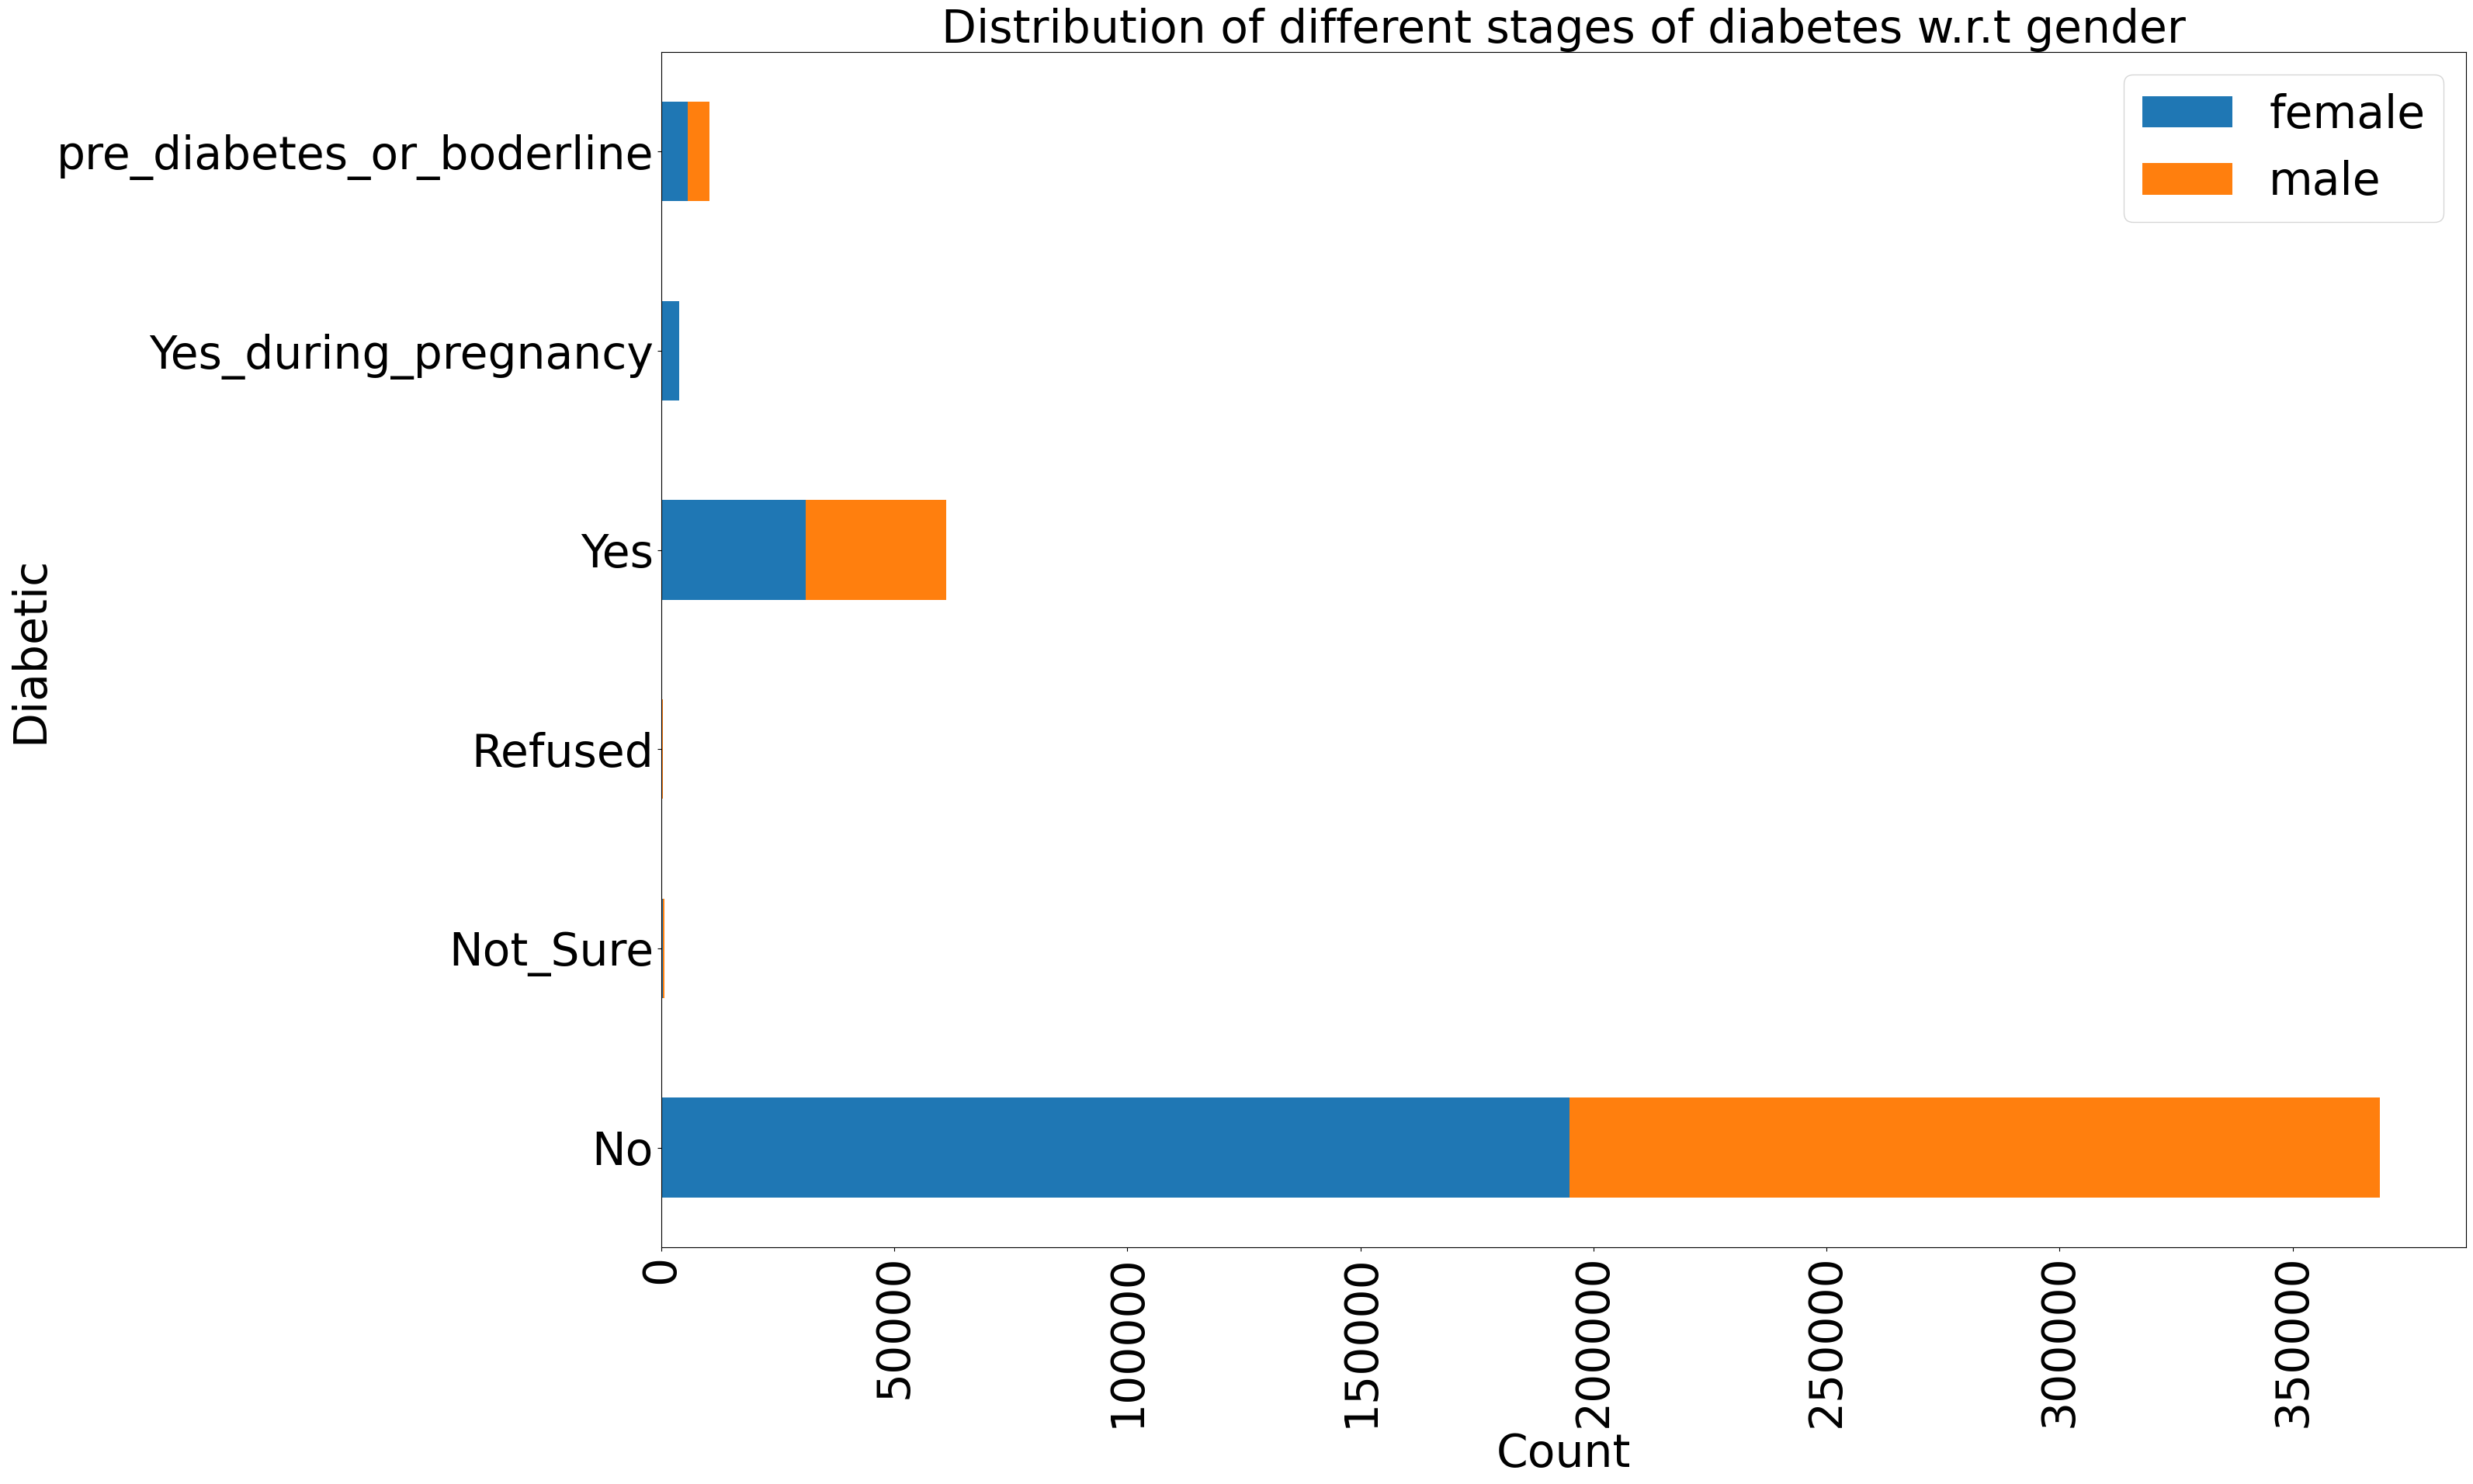

In [16]:
diabetic_sex = pd.pivot_table(final_data[['diabetic','Sex']], 
                              index='diabetic', columns=['Sex'], values='Sex', aggfunc = 'size')

ax = diabetic_sex.plot(kind='barh', stacked=True,figsize=(30,20),fontsize=42)
plt.xlabel('Count',fontsize=42)
plt.ylabel('Diabetic',fontsize=42)
plt.legend(fontsize=42)
plt.xticks(rotation = 90)
plt.title('Distribution of different stages of diabetes w.r.t gender',fontsize=42)
plt.show()

/var/folders/hp/n92g34w508j_9d8zmklf0xjm0000gn/T/ipykernel_32347/2891097182.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data1['Age_Group'] = final_data1['Age_Group'].replace(age_groups)


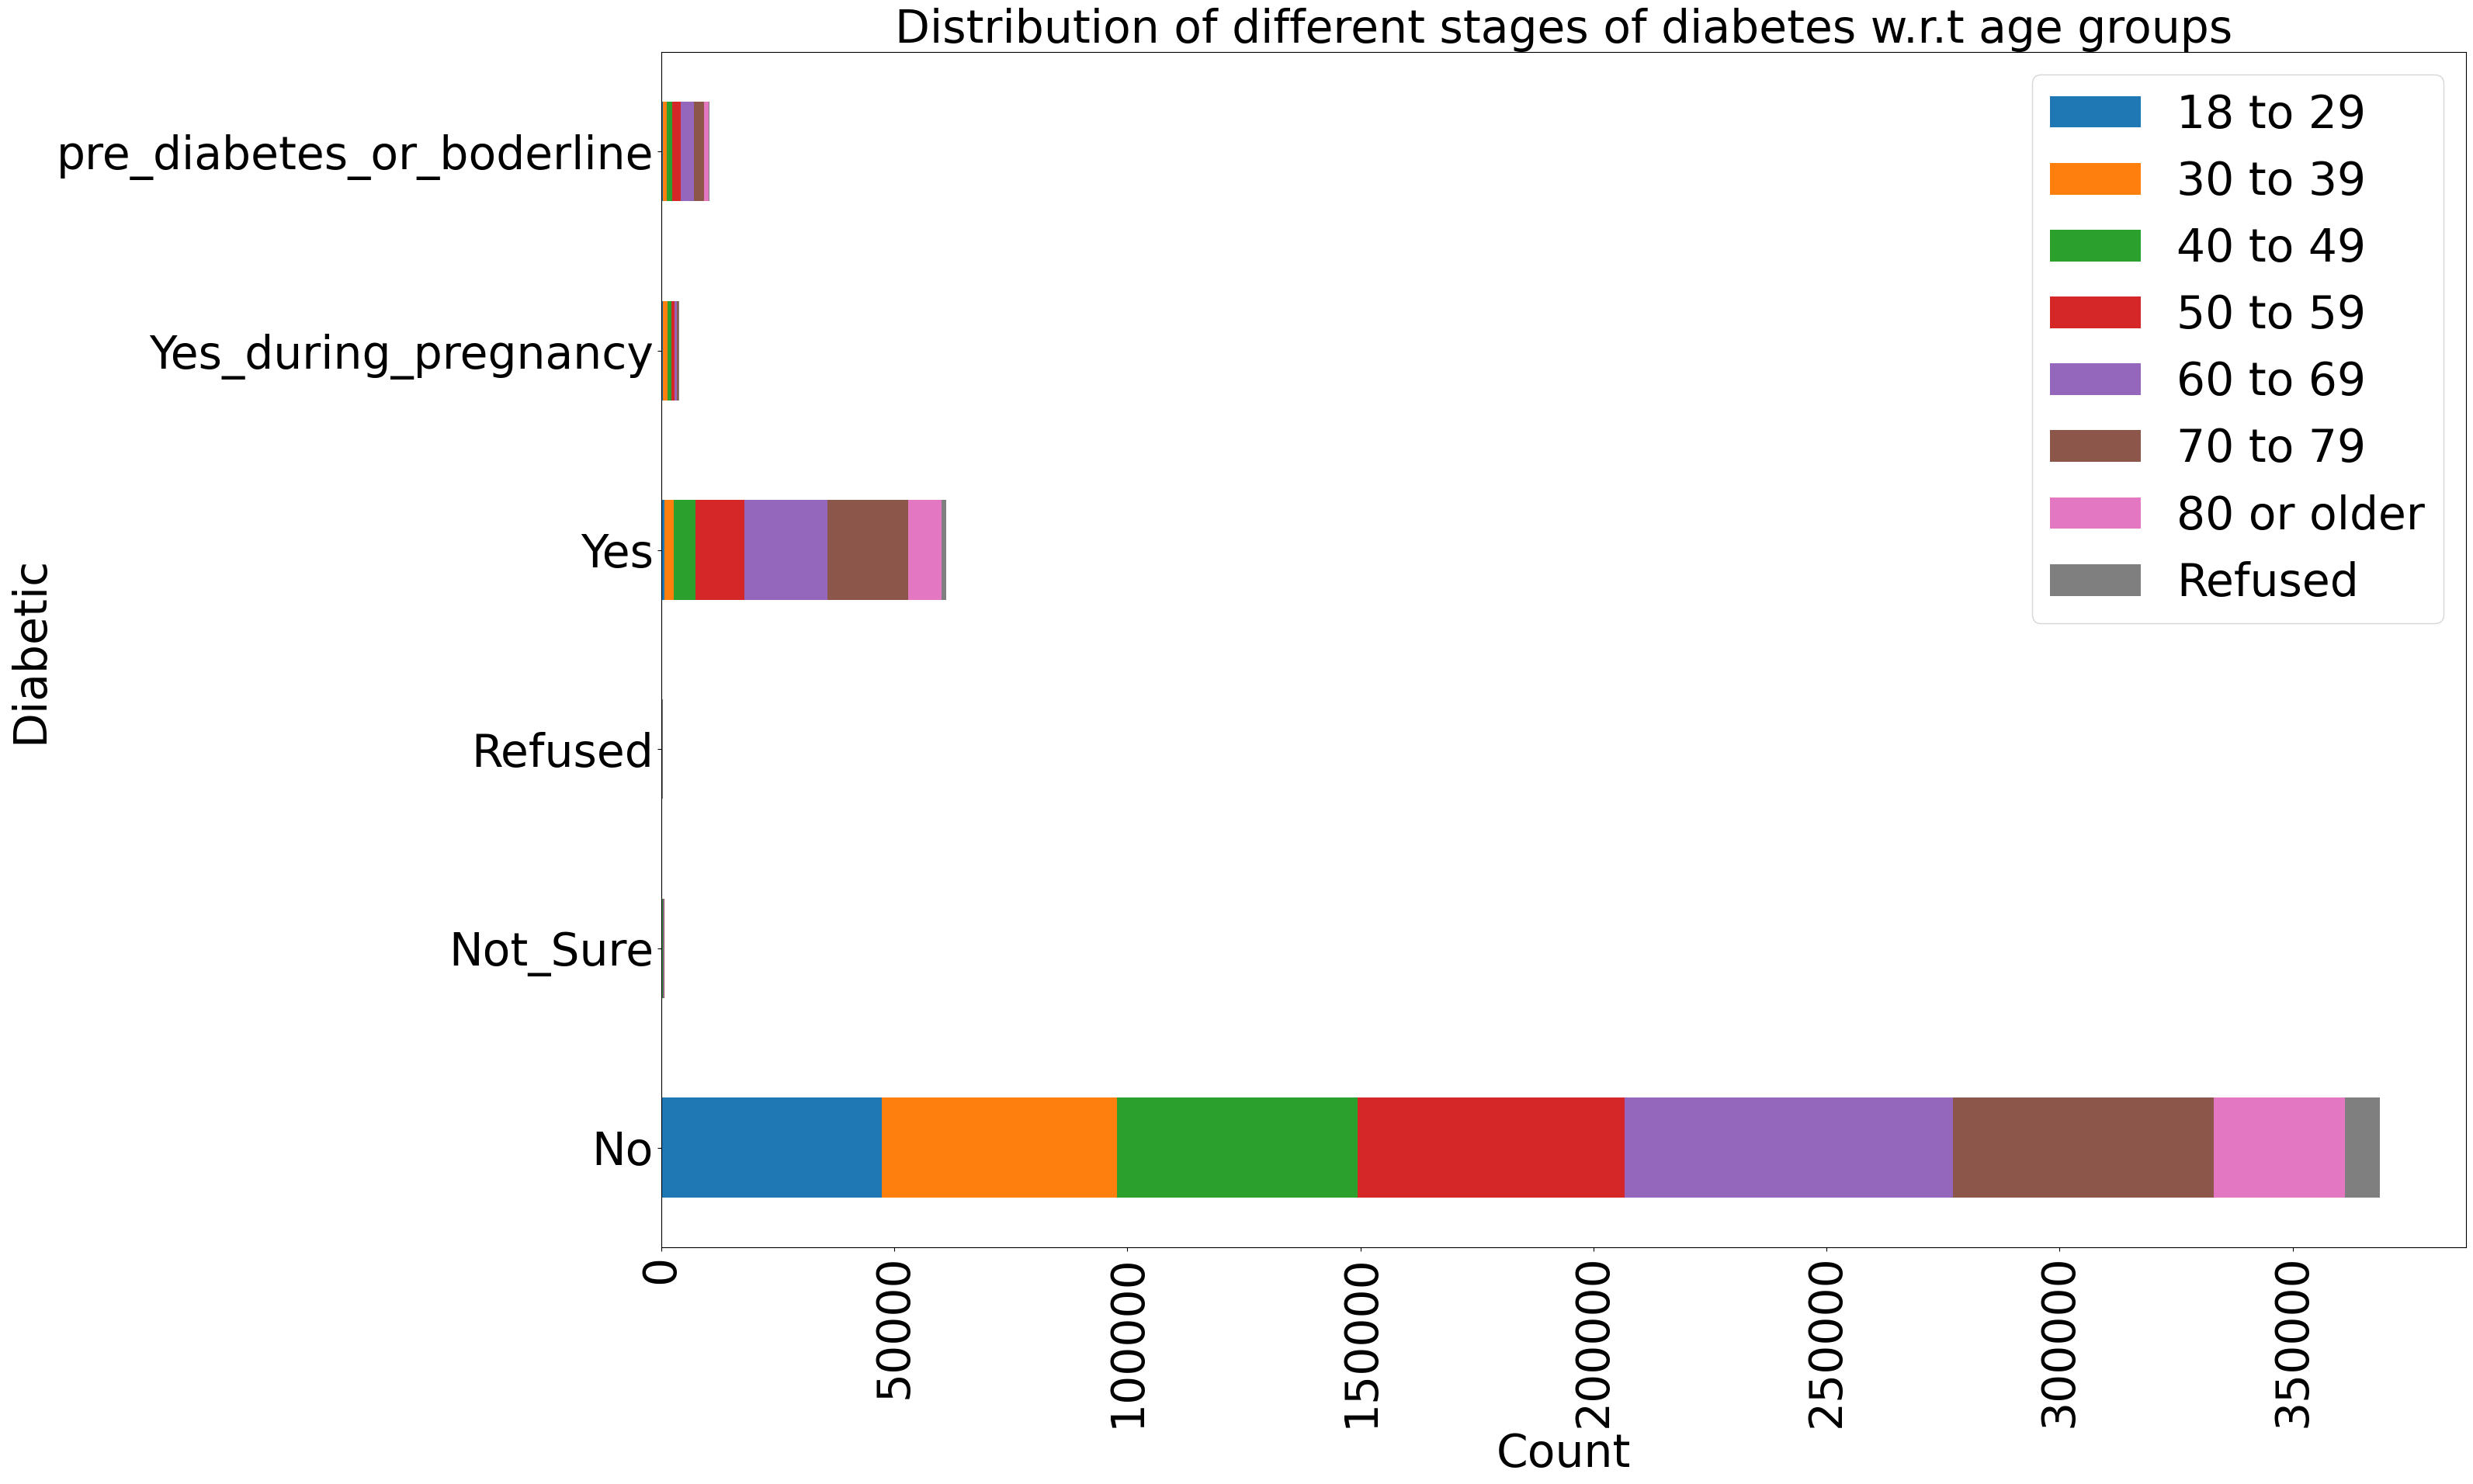

In [17]:
age_groups = {'18 to 24':'18 to 29', '25 to 29':'18 to 29',
              '30 to 34':'30 to 39', '35 to 39':'30 to 39',
              '40 to 44':'40 to 49', '45 to 49':'40 to 49',
              '50 to 54':'50 to 59', '55 to 59':'50 to 59',
              '60 to 64':'60 to 69', '65 to 69':'60 to 69',
              '70 to 74':'70 to 79', '75 to 79':'70 to 79'}
final_data1 = final_data
final_data1['Age_Group'] = final_data1['Age_Group'].replace(age_groups)
diabetic_agegroup = pd.pivot_table(final_data[['diabetic','Age_Group']], 
                              index='diabetic', columns=['Age_Group'], values='Age_Group', aggfunc = 'size')



ax = diabetic_agegroup.plot(kind='barh', stacked=True,figsize=(30,20),fontsize=42)
plt.xlabel('Count',fontsize=42)
plt.ylabel('Diabetic',fontsize=42)
plt.legend(fontsize=42)
plt.xticks(rotation = 90)
plt.title('Distribution of different stages of diabetes w.r.t age groups',fontsize=42)

plt.show()

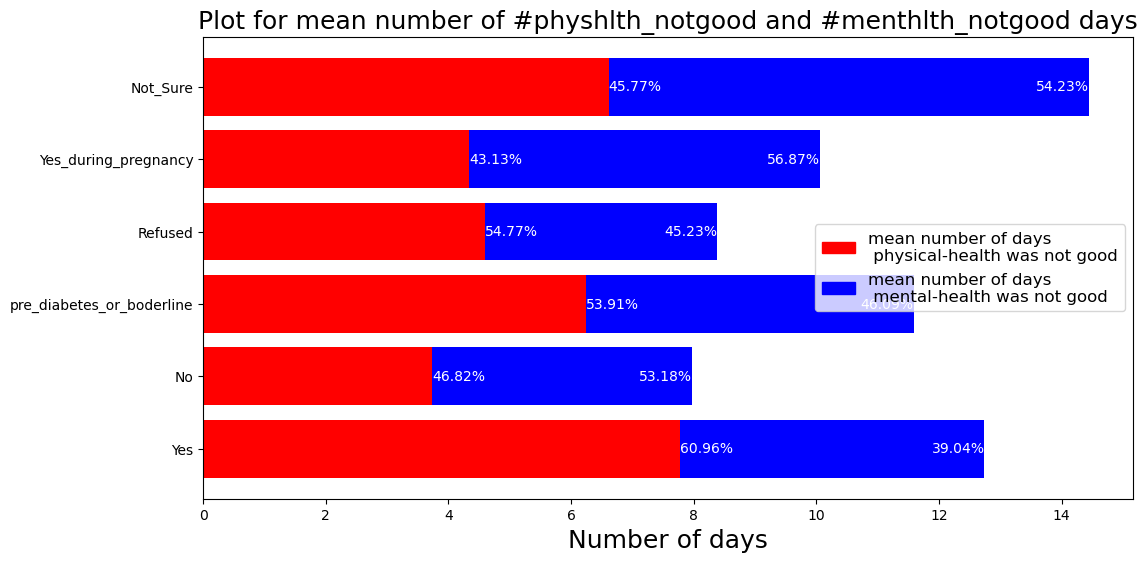

In [18]:
keys=[]
arr1=[]
arr2=[]

for i in final_data["diabetic"].unique():
    keys.append(i)
    arr1.append(final_data.loc[final_data["diabetic"] == i][["#physhlth_notgood", "#menthlth_notgood"]].mean().values[0])
    arr2.append(final_data.loc[final_data["diabetic"] == i][["#physhlth_notgood", "#menthlth_notgood"]].mean().values[1])

plt.figure(figsize=(12, 6))

bars1 = plt.barh(keys[:-1], arr1[:-1], color='r')
bars2 = plt.barh(keys[:-1], arr2[:-1], left=arr1[:-1], color='b')

plt.xlabel("Number of days", fontsize=18)
plt.title("Plot for mean number of #physhlth_notgood and #menthlth_notgood days", fontsize=18)

legend_patches = [
    mpatches.Patch(color='r', label='mean number of days\n physical-health was not good'),
    mpatches.Patch(color='b', label='mean number of days\n mental-health was not good')
]

# Add legend using the custom legend patches
plt.legend(handles=legend_patches, loc="center right", fontsize=12)

# Add percentage labels within the bars
for bar1, bar2 in zip(bars1, bars2):
    x1 = bar1.get_width()
    x2 = bar2.get_width()
    total = x1 + x2

    plt.text(x1, bar1.get_y() + bar1.get_height() / 2, f'{(x1 / total) * 100:.2f}%', ha='left', va='center', fontsize=10, color='white')
    plt.text(x1 + x2, bar2.get_y() + bar2.get_height() / 2, f'{(x2 / total) * 100:.2f}%', ha='right', va='center', fontsize=10, color='white')

plt.show()


In [19]:
df1=final_data[["Income","health_care_access"]].value_counts().reset_index(name="count")
df1["Income"]=df1["Income"].sort_values()
data_dict={
    '50,000_to_75,000':62500, 
    '100,000_to_150,000':125000,
    '75,000_to_100,000':87500,
    'Refused':0,
    '35,000_to_50,000':42500,
    '25,000_to_35,000':30000,
    'Not_sure':1,
    '200,000_or_more':200000,
    '150,000_to_200,000':175000,
    '20,000_to_25,000':22500,
    '15,000_to_20,000':17500,
    'Not asked or Missing':2,
    '10,000_to_15,000':12500,
    'Less than 10,000':10000
}

df1["Income"]=df1["Income"].replace(data_dict)
print(df1)
df1=df1.sort_values(by = ["Income"])
print(df1)

df1["Income"]=df1["Income"].astype("str")
data_dict={
    "0":'Refused',
    "1":'Don’t know/Not sure',
    "2":'Not asked or Missing'
}
df1["Income"]=df1["Income"].replace(data_dict)



    Income health_care_access  count
0    62500         can_afford  54677
1   125000         can_afford  48502
2    87500         can_afford  45894
3        0         can_afford  44553
4    42500         can_afford  41983
5    30000         can_afford  36300
6        1         can_afford  31796
7   200000         can_afford  23064
8   175000         can_afford  22013
9    22500         can_afford  17073
10   17500         can_afford  11789
11   12500         can_afford   9178
12   10000         can_afford   7925
13   30000    couldnot_afford   5827
14   42500    couldnot_afford   4724
15   62500    couldnot_afford   4377
16       1    couldnot_afford   3938
17   22500    couldnot_afford   3196
18   87500    couldnot_afford   2478
19   17500    couldnot_afford   2442
20   10000    couldnot_afford   2337
21       0    couldnot_afford   2123
22   12500    couldnot_afford   1792
23  125000    couldnot_afford   1779
24  175000    couldnot_afford    519
25  200000    couldnot_afford    392
2

In [20]:
df1=df1.loc[:,:].reset_index().drop(columns="index").loc[8:,:]

/Users/rohithreddypeddi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rohithreddypeddi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


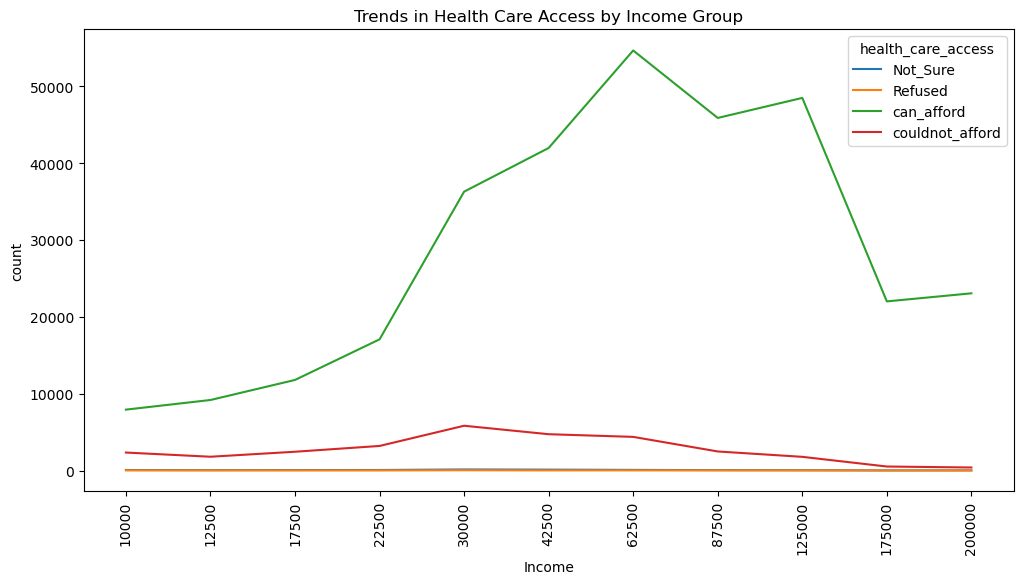

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Income', y='count', hue='health_care_access', data=df1)
plt.title('Trends in Health Care Access by Income Group')
plt.xticks(rotation=90)
plt.show()

In [22]:
states_latitude = pd.read_csv('states_latitudes.csv')
final_data_latitude = final_data.merge(states_latitude[['State','latitude','longitude']],
                                       on = ['State'], how = 'left')

In [23]:
state_diabetic = final_data_latitude[final_data_latitude['diabetic']=='Yes']
state_diabetic_group = state_diabetic.groupby(['State','latitude','longitude'])['diabetic'].count().reset_index()
map_center = [state_diabetic['latitude'].mean(), state_diabetic['longitude'].mean()]

In [24]:
max_state = state_diabetic_group[state_diabetic_group['diabetic']==state_diabetic_group['diabetic'].max()]['State'].values[0]
min_state = state_diabetic_group[state_diabetic_group['diabetic']==state_diabetic_group['diabetic'].min()]['State'].values[0]

/var/folders/hp/n92g34w508j_9d8zmklf0xjm0000gn/T/ipykernel_32347/2353124873.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


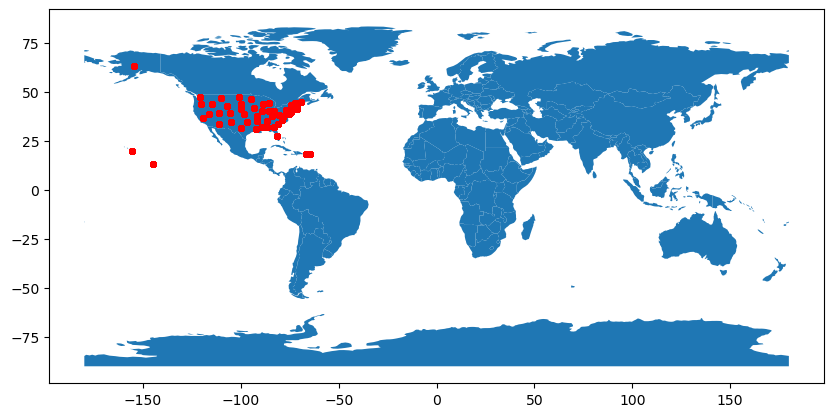

In [25]:

geometry = [Point(xy) for xy in zip(state_diabetic['longitude'], state_diabetic['latitude'])]
gdf = GeoDataFrame(state_diabetic, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

<Axes: ylabel='Sleeping time'>

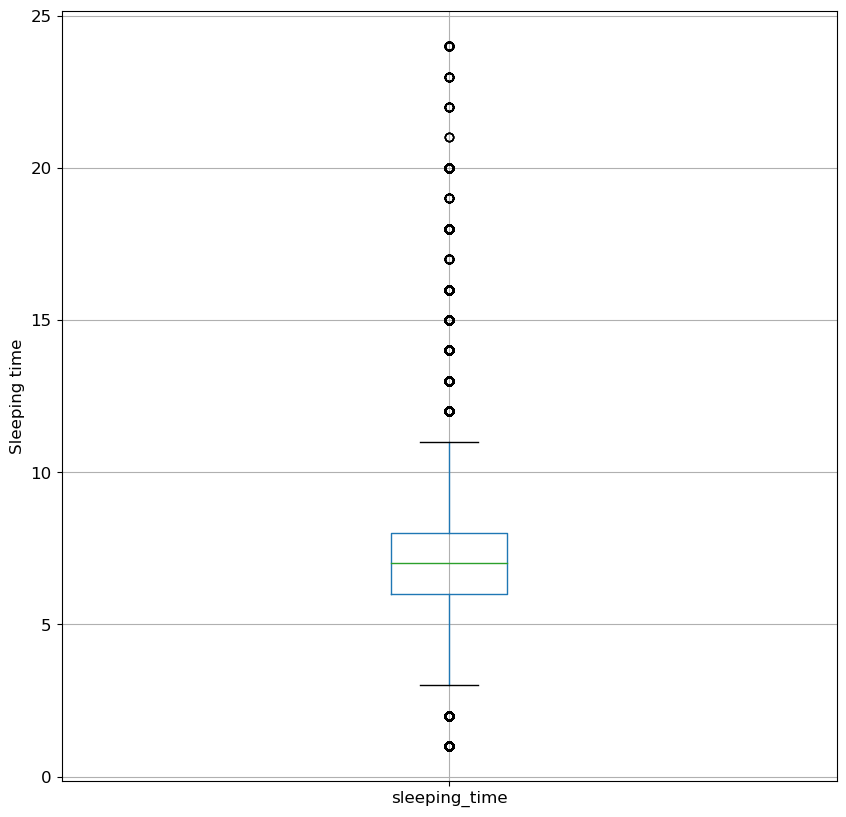

In [26]:
plt.figure(figsize=(10,10))
plt.ylabel('Sleeping time',fontsize=12)
final_data[["sleeping_time"]].boxplot(fontsize=12)

# pre processing and data cleaning

In [66]:
final_data.loc[final_data['Sex']=='male','pregnant'] = 'not_applicable'
final_data.loc[final_data['pregnant'].isin([np.nan,'Refused','Not_Sure']),'pregnant'] = 'not_sure'


final_data.loc[final_data['sleeping_time']>15,'sleeping_time'] = 15
final_data.loc[final_data['sleeping_time'].isnull(),'sleeping_time'] = final_data['sleeping_time'].mean()


final_data.loc[final_data['#physhlth_notgood'].isna(),'#physhlth_notgood'] = final_data['#physhlth_notgood'].mean()
final_data.loc[final_data['#physhlth_notgood']>25,'physhlth_cat'] = 'very_unhealthy'
final_data.loc[final_data['#physhlth_notgood']<=5,'physhlth_cat'] = 'very_healthy'
final_data.loc[(final_data['#physhlth_notgood']<=25) & (final_data['#physhlth_notgood']>15),'physhlth_cat'] = 'unhealthy'
final_data.loc[(final_data['#physhlth_notgood']<=15) & (final_data['#physhlth_notgood']>5),'physhlth_cat'] = 'healthy'


final_data['#physhlth_notgood'].value_counts(),final_data['#physhlth_notgood'].unique()

final_data.loc[final_data['#menthlth_notgood'].isna(),'#menthlth_notgood'] = final_data['#menthlth_notgood'].mean()
final_data.loc[final_data['#menthlth_notgood']>25,'menhlth_cat'] = 'very_unhealthy'
final_data.loc[final_data['#menthlth_notgood']<=5,'menhlth_cat'] = 'very_healthy'
final_data.loc[(final_data['#menthlth_notgood']<=25) & (final_data['#menthlth_notgood']>15),'menhlth_cat'] = 'unhealthy'
final_data.loc[(final_data['#menthlth_notgood']<=15) & (final_data['#menthlth_notgood']>5),'menhlth_cat'] = 'healthy'


final_data['smoking'].unique()

final_data.loc[final_data['smoking'].isin([np.nan,'Not_Sure', 'Refused']),'smoking'] = 'not_sure'
final_data.loc[final_data['smoking']=='Every day','smoking'] = 'Every_day'
final_data.loc[final_data['smoking']=='Some days','smoking'] = 'Some_days'
final_data.loc[final_data['smoking']=='Not at all','smoking'] = 'Not_at_all'

final_data.loc[final_data['deaf'].isin([np.nan,'Not_Sure', 'Refused']),'deaf'] = 'not_sure'
final_data.loc[final_data['blind'].isin([np.nan,'Not_Sure', 'Refused']),'blind'] = 'not_sure'
final_data.loc[final_data['diffwalk'].isin([np.nan,'Not_Sure', 'Refused']),'diffwalk'] = 'not_sure'
final_data.loc[final_data['diffconcentrating'].isin([np.nan,'Not_Sure', 'Refused']),'diffconcentrating'] = 'not_sure'


final_data.loc[final_data['Had_heartstroke'].isin([np.nan,'Not_Sure', 'Refused']),'Had_heartstroke'] = 'not_sure'
final_data.loc[final_data['had_asthma'].isin([np.nan,'Not_Sure', 'Refused']),'had_asthma'] = 'not_sure'
final_data.loc[final_data['melanoma_or_any_other_cancer'].isin([np.nan,'Not_Sure', 'Refused']),'melanoma_or_any_other_cancer'] = 'not_sure'
final_data.loc[final_data['had_depressive_disorder'].isin([np.nan,'Not_Sure', 'Refused']),'had_depressive_disorder'] = 'not_sure'


final_data.loc[final_data['Employed'].isin([np.nan,'Not asked or Missing', 'Refused']),'Employed'] = 'not_sure'
final_data.loc[final_data['Income'].isin([np.nan, 'Not asked or Missing', 'Refused','Not_sure']),'Income'] = 'not_sure'


final_data.loc[final_data['general_health'].isin([np.nan,'Not_Sure','Refused']),'general_health'] = 'not_sure'
final_data.loc[final_data['insurance_plan'].isin([np.nan,'Not_Sure','Refused']),'insurance_plan'] = 'not_sure'
final_data.loc[final_data['health_care_access'].isin([np.nan,'Not_Sure','Refused']),'health_care_access'] = 'not_sure'


final_data.diabetic.value_counts()

final_data = final_data[~((final_data['diabetic']=='Yes_during_pregnancy') &
              (final_data['Sex']=='male'))]

final_data.loc[final_data['diabetic'].isin(['pre_diabetes_or_boderline','Yes_during_pregnancy']),'diabetic'] = 'Yes'
final_data.loc[final_data['diabetic'].isin([np.nan,'Refused','Not_Sure']),'diabetic'] = 'Yes'


final_data.loc[final_data['martial_status'].isin(['Refused',np.nan]),'martial_status']='unknown'
final_data.loc[final_data['last_visited_doctor'].isin(['Refused',np.nan,'Not_Sure']),'last_visited_doctor']='not_sure'
final_data.loc[final_data['Exercise_done_in_last_month'].isin(['Refused',np.nan,'Not_Sure']),'Exercise_done_in_last_month']='unknown'


final_data.loc[final_data['Age_Group'].isin(['Refused']),'Age_Group']='not_sure'
final_data.loc[final_data['Teeth_removed'].isin([np.nan]),'Teeth_removed']='not_sure'



final_data.isnull().sum()

/var/folders/hp/n92g34w508j_9d8zmklf0xjm0000gn/T/ipykernel_32347/747812005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.loc[final_data['#physhlth_notgood']>25,'physhlth_cat'] = 'very_unhealthy'
/var/folders/hp/n92g34w508j_9d8zmklf0xjm0000gn/T/ipykernel_32347/747812005.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.loc[final_data['#menthlth_notgood']>25,'menhlth_cat'] = 'very_unhealthy'


height                          0
weight                          0
BMI                             0
sleeping_time                   0
Had_heartstroke                 0
Teeth_removed                   0
had_asthma                      0
melanoma_or_any_other_cancer    0
had_depressive_disorder         0
Sex                             0
Age_Group                       0
Language                        0
State                           0
Employed                        0
Income                          0
pregnant                        0
smoking                         0
Race                            0
deaf                            0
blind                           0
diffwalk                        0
diffconcentrating               0
general_health                  0
#physhlth_notgood               0
#menthlth_notgood               0
insurance_plan                  0
health_care_access              0
diabetic                        0
martial_status                  0
last_visited_d

In [67]:
for i in final_data.columns:
    print('unique values for '+i ,final_data[i].unique())
    print('distribution of values in '+i, final_data[i].value_counts())

unique values for height [1.70264708 1.6002     1.5748     1.651      1.8034     1.6256
 1.7018     1.6764     1.7272     1.5494     1.9304     1.8796
 1.778      1.8542     1.7526     1.524      1.8288     1.905
 1.9558     1.4986     1.4478     1.4224     1.2446     1.4732
 1.2192     1.9812     2.032      2.0066     1.2954     1.397
 1.3462     1.65       1.82       1.67       1.76       2.1082
 1.3716     1.64       1.75       1.83       1.8        1.71
 2.159      2.2606     0.9144     2.0574     1.143      1.52
 1.7        1.74       1.51       1.53       1.69       1.56
 1.84       1.9        1.6        1.54       1.72       1.87
 1.57       1.63       1.61       1.49       1.59       1.78
 1.4        1.5        1.55       1.58       1.88       1.62
 1.68       1.79       1.45       1.46       1.89       2.1336
 0.9906     2.0828     2.2098     1.3208     1.73       2.1844
 1.77       2.3622     1.25       1.66       1.85       1.86
 1.95       1.47       1.1938     1.05       1

unique values for Employed ['Retired' 'Self-employed' 'A homemaker' 'Employed for wages'
 'Unable to work' 'Out of work for less than 1 year'
 'Out of work for 1 year or more' 'not_sure' 'A student']
distribution of values in Employed Employed
Employed for wages                  185986
Retired                             137082
Self-employed                        38766
Unable to work                       26735
A homemaker                          17475
not_sure                             11239
A student                            11111
Out of work for 1 year or more        8667
Out of work for less than 1 year      8043
Name: count, dtype: int64
unique values for Income ['not_sure' '25,000_to_35,000' '150,000_to_200,000' '75,000_to_100,000'
 '50,000_to_75,000' '100,000_to_150,000' '35,000_to_50,000'
 '20,000_to_25,000' '10,000_to_15,000' '200,000_or_more'
 '15,000_to_20,000' 'Less than 10,000']
distribution of values in Income Income
not_sure              96041
50,000_to_75,000     

/Users/rohithreddypeddi/anaconda3/lib/python3.11/site-packages/dython/nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/Users/rohithreddypeddi/anaconda3/lib/python3.11/site-packages/dython/nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


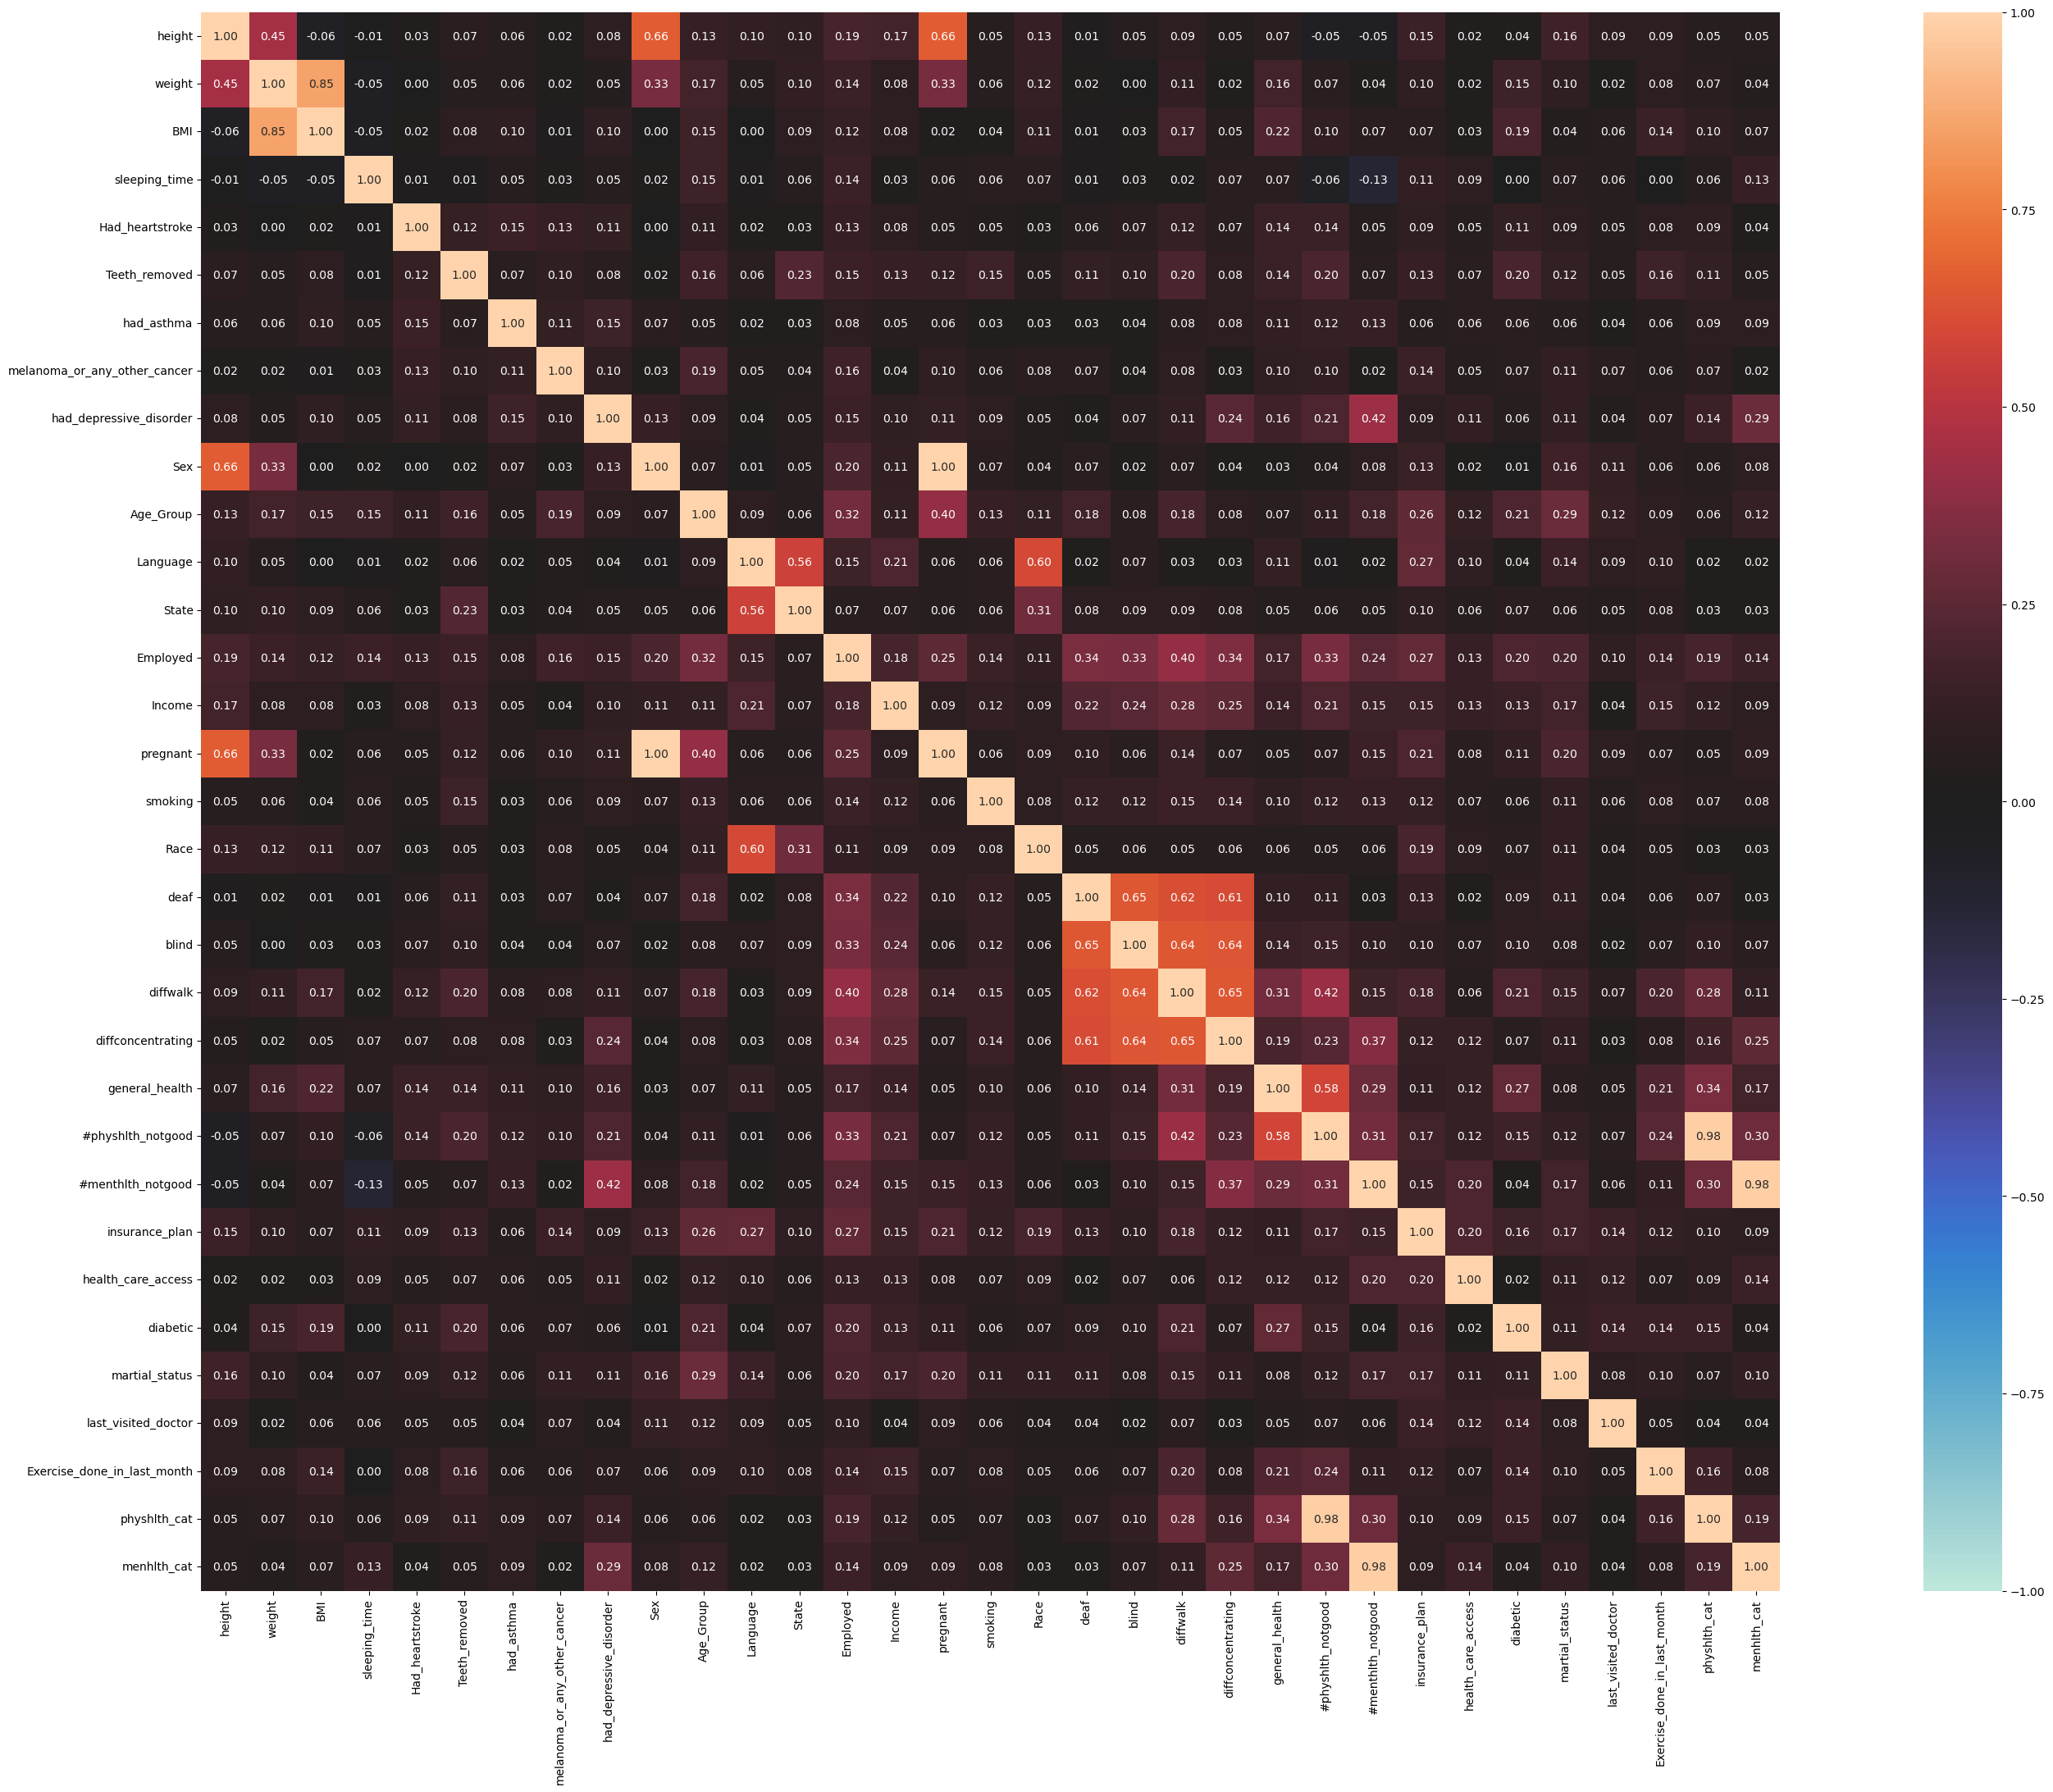

<Figure size 3500x1000 with 0 Axes>

In [29]:
associations(final_data,compute_only = False,figsize=(45,25))
plt.figure(figsize=(35,10))
plt.show()

# Hypothesis Testing

Null Hypothesis (H0): There is no significant difference in average sleep duration between individuals with and without diabetes.
    
    
Alternative Hypothesis (H1): Individuals with diabetes have a significantly different average sleep duration compared to those without diabetes.

In [30]:
import pandas as pd
from scipy.stats import f_oneway

final_data['diabetes_numeric'] = final_data['diabetic'].map({'Yes': 1, 'No': 0})
f_statistic, p_value = f_oneway(final_data[final_data['diabetic'] == 'Yes']['sleeping_time'],
                                 final_data[final_data['diabetic'] == 'No']['sleeping_time'])
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in average sleep duration between individuals with and without diabetes.")
else:
    print("There is no significant difference in average sleep duration between individuals with and without diabetes.")

F-statistic: 2.226002981182058
P-value: 0.1357052148941835
There is no significant difference in average sleep duration between individuals with and without diabetes.


/var/folders/hp/n92g34w508j_9d8zmklf0xjm0000gn/T/ipykernel_32347/209898366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['diabetes_numeric'] = final_data['diabetic'].map({'Yes': 1, 'No': 0})


Null Hypothesis (H0): There is no significant association between having diabetes and reporting a certain number of mentally unhealthy days.
    
Alternative Hypothesis (H1): The number of mentally unhealthy days is significantly different between individuals with and without diabetes.

In [31]:
f_statistic, p_value = f_oneway(final_data[final_data['diabetic'] == 'Yes']['#menthlth_notgood'],
                                 final_data[final_data['diabetic'] == 'No']['#menthlth_notgood'])
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in average sleep duration between individuals with and without diabetes.")
else:
    print("There is no significant difference in average sleep duration between individuals with and without diabetes.")

F-statistic: 626.6352728816903
P-value: 3.3621842914880914e-138
There is a significant difference in average sleep duration between individuals with and without diabetes.


<Axes: >

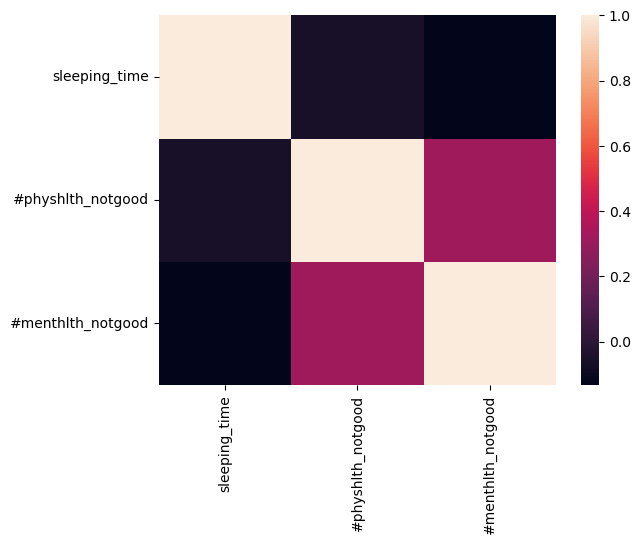

In [32]:
sns.heatmap(final_data[["sleeping_time","#physhlth_notgood","#menthlth_notgood"]].corr())

# Modeling

In [68]:
model_data = final_data
model_data['diabetic'] = model_data['diabetic'].map({'Yes':1,'No':0})
cls0 = model_data[model_data['diabetic']==0]
cls1 = model_data[model_data['diabetic']==1]
cls0_ = cls0.sample(int(cls1.shape[0]*1.2))
dff = pd.concat([cls0_,cls1])
dff.shape

(168040, 33)

In [69]:
def data_split(data):
    input_features = data.drop(['diabetic','height','weight','State','Sex','pregnant','smoking'], axis=1)
    target_feature = data['diabetic']
    target_feature.value_counts()
    features_encoded = pd.get_dummies(input_features)
    X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_feature, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [70]:
X_train, X_test, y_train, y_test = data_split(dff)

# kmeans

/Users/rohithreddypeddi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


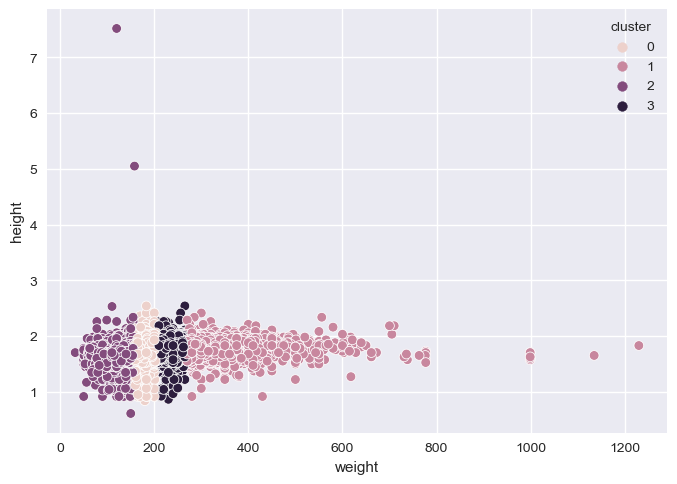

In [100]:
import random 
import pandas as pd

from sklearn.cluster import KMeans
import folium # geospatial data

import matplotlib.pyplot  as plt
import seaborn as sns #viz
%matplotlib inline

random.seed(1233)
model = KMeans(n_clusters = 4)
from sklearn.preprocessing import StandardScaler
kmeans_data = model_data
# kmeans_data[['height','weight','sleeping_time','#physhlth_notgood','#menthlth_notgood']] = StandardScaler().fit_transform(kmeans_data[['height','weight','sleeping_time','#physhlth_notgood','#menthlth_notgood']])

input_features_kmeans = kmeans_data.drop(['diabetic','State','BMI','Sex','pregnant','smoking'], axis=1)
features_encoded_kmeans = pd.get_dummies(input_features_kmeans)
target_feature_kmeans = kmeans_data['diabetic']
y_kmeans = model.fit_predict(features_encoded_kmeans)
y_kmeans

features_encoded_kmeans['cluster'] = y_kmeans
features_encoded_kmeans['diabetic'] = target_feature_kmeans

sns.scatterplot(x="weight", y="height", hue=features_encoded_kmeans['cluster'], data=features_encoded_kmeans)
plt.show()

# Decision Tree

In [101]:
def DecisionTree(X_train, X_test, y_train, y_test, tuning):
    '''
    This function takes input as train and test datasets and gives out the prediction metrics for the model.
    X_train : training data set
    X_test : testing data set
    y_train : target varaible for training data
    y_test : target varaible for test data
    tuning : argument whether hyper parameter tuning is required or not
    '''
    if tuning == False:
        clf_dec = DecisionTreeClassifier(random_state=42)
        clf_dec.fit(X_train, y_train)
    else:
        params = {
            'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            'criterion': ["gini", "entropy"]
        }

        grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), 
                                   param_grid=params, 
                                   cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
        grid_search.fit(X_train, y_train)
        clf_dec = grid_search.best_estimator_
        
    y_pred = clf_dec.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    f1 = f1_score(y_test, y_pred)
    print("f1_score: %.2f%%" % (f1 * 100.0))

    recall = recall_score(y_test, y_pred)
    print("recall_score: %.2f%%" % (recall * 100.0))

    precision = precision_score(y_test, y_pred)
    print("precision_score: %.2f%%" % (precision * 100.0))


    plt.figure(figsize=(5,3))
    rf_confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
    sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    return clf_dec.predict_proba(X_test), clf_dec

Accuracy: 62.60%
f1_score: 59.41%
recall_score: 59.44%
precision_score: 59.37%


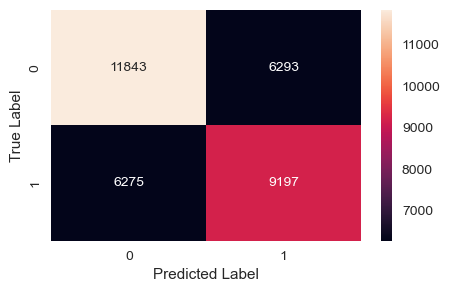

In [102]:
dt, clf_dec = DecisionTree(X_train, X_test, y_train, y_test, False)

# Random Forest

In [94]:
def RandomForest(X_train, X_test, y_train, y_test, tuning):
    '''
    This function takes input as train and test datasets and gives out the prediction metrics for the model.
    X_train : training data set
    X_test : testing data set
    y_train : target varaible for training data
    y_test : target varaible for test data
    tuning : argument whether hyper parameter tuning is required or not
    '''
    if tuning == False:
        clf_rf =  RandomForestClassifier(random_state=42)
        clf_rf.fit(X_train, y_train)
    else:
        params = {
            'n_estimators': [5,20,50,100],
            'max_features': ['auto', 'sqrt'],
            'max_depth': [int(x) for x in np.linspace(10, 120, num = 12)],
            'min_samples_split': [2, 6, 10],
            'min_samples_leaf': [1, 3, 4],
            'bootstrap': [True, False]
        }

        rf_random = RandomizedSearchCV(estimator =  RandomForestClassifier(),param_distributions = params,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
        rf_random.fit(X_train, y_train)
        clf_rf = rf_random.best_estimator_
    print(clf_rf) 
    y_pred = clf_rf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    f1 = f1_score(y_test, y_pred)
    print("f1_score: %.2f%%" % (f1 * 100.0))

    recall = recall_score(y_test, y_pred)
    print("recall_score: %.2f%%" % (recall * 100.0))

    precision = precision_score(y_test, y_pred)
    print("precision_score: %.2f%%" % (precision * 100.0))


    plt.figure(figsize=(5,3))
    rf_confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
    sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    return clf_rf.predict_proba(X_test)

RandomForestClassifier(random_state=42)
Accuracy: 70.94%
f1_score: 68.62%
recall_score: 69.03%
precision_score: 68.22%


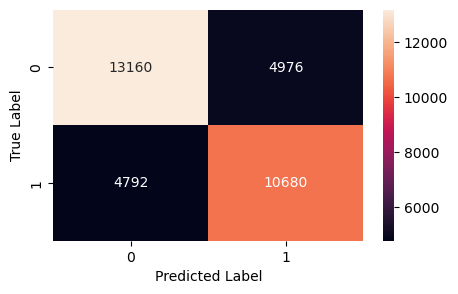

In [95]:
rf = RandomForest(X_train, X_test, y_train, y_test, False)

# Feature importance plot

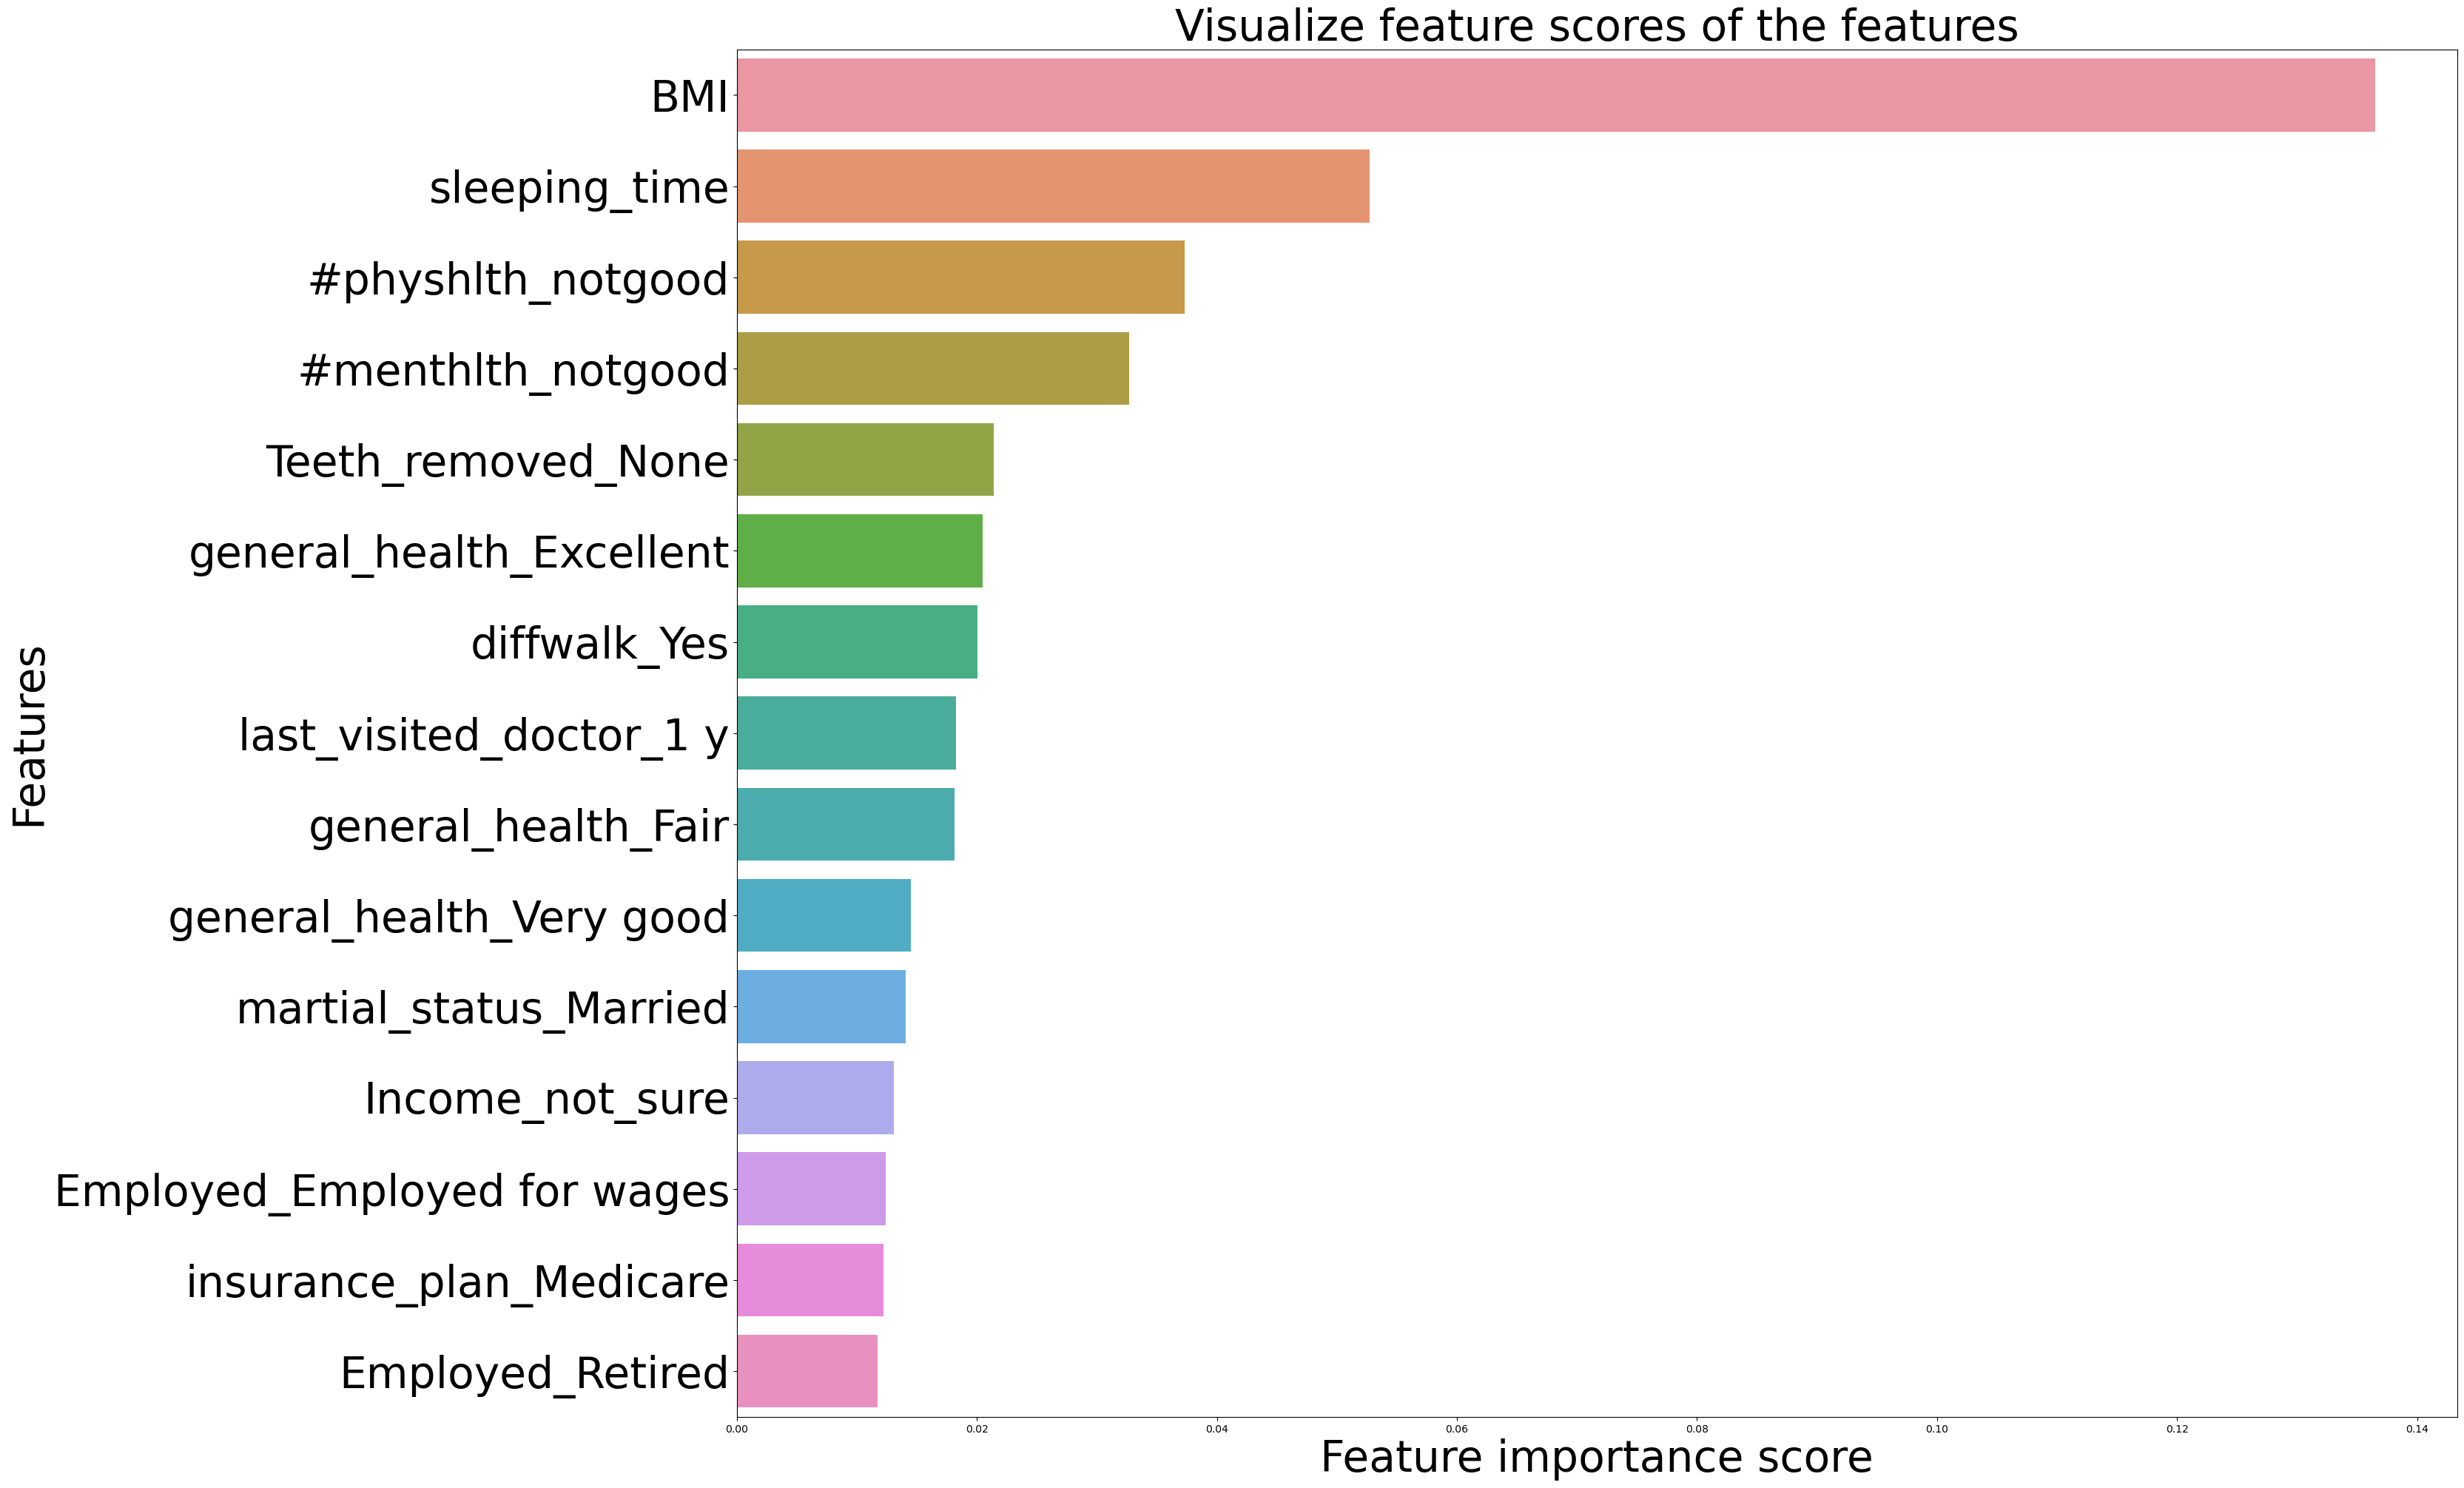

In [76]:
clf_rf =  RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
feature_scores = pd.Series(clf_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores1 = feature_scores[:15]
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores1, y=feature_scores1.index)
ax.set_title("Visualizing feature importance scores of the features",fontsize = 42)
ax.set_yticklabels(feature_scores1.index,fontsize = 42)
ax.set_xlabel("Feature importance score",fontsize = 42)
ax.set_ylabel("Features",fontsize = 42)
plt.show()

In [77]:
def Logisticregression(X_train, X_test, y_train, y_test, tuning):

    if tuning == False:
        clf_log = LogisticRegression(random_state=42)
        clf_log.fit(X_train, y_train)
    else:
        params = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],  
            'solver': ['liblinear', 'saga']  
        }

        grid_search = GridSearchCV(estimator=LogisticRegression(), 
                                   param_grid=params, 
                                   cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
        grid_search.fit(X_train, y_train)
        clf_log = grid_search.best_estimator_
        
    y_pred = clf_log.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    f1 = f1_score(y_test, y_pred)
    print("f1_score: %.2f%%" % (f1 * 100.0))

    recall = recall_score(y_test, y_pred)
    print("recall_score: %.2f%%" % (recall * 100.0))

    precision = precision_score(y_test, y_pred)
    print("precision_score: %.2f%%" % (precision * 100.0))


    plt.figure(figsize=(5,3))
    rf_confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
    sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    return

/Users/rohithreddypeddi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 71.58%
f1_score: 68.95%
recall_score: 68.54%
precision_score: 69.36%


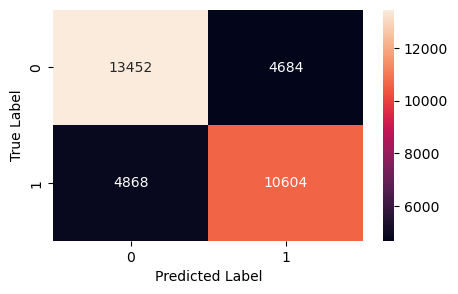

In [78]:
Logisticregression(X_train, X_test, y_train, y_test, False)

In [89]:
def xgboost(X_train, X_test, y_train, y_test, tuning):
    
    X_train.columns = X_train.columns.str.replace(' ','_')
    X_test.columns = X_test.columns.str.replace(' ','_')

    if tuning == False:
        model_xgb = xgb.XGBClassifier()
        model_xgb.fit(X_train, y_train)
    else:
        space = {
            'max_depth': hp.quniform('max_depth', 2, 8, 1),
            'learning_rate': hp.loguniform('learning_rate', -5, -2),
            'subsample': hp.uniform('subsample', 0.5, 1)
        }
        def objective(params):
            params['max_depth'] = int(params['max_depth'])
            xgb_model = xgb.XGBClassifier(**params)
            xgb_model.fit(X_train, y_train)
            y_pred = xgb_model.predict(X_test)
            score = accuracy_score(y_test, y_pred)
            return {'loss': -score, 'status':STATUS_OK}

        best_params = fmin(objective, space, algo=tpe.suggest, max_evals=100)
        best_params['max_depth'] = int(best_params['max_depth'])
        print("Best set of hyperparameters: ", best_params)
        model_xgb = XGBClassifier(**best_params)
        model_xgb.fit(X_train, y_train)


    y_pred = model_xgb.predict(X_test)
    predictions = [round(value) for value in y_pred]

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    f1 = f1_score(y_test, predictions)
    print("f1_score: %.2f%%" % (f1 * 100.0))

    recall = recall_score(y_test, predictions)
    print("recall_score: %.2f%%" % (recall * 100.0))

    precision = precision_score(y_test, predictions)
    print("precision_score: %.2f%%" % (precision * 100.0))


    plt.figure(figsize=(5,3))
    rf_confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
    sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    return model_xgb.predict_proba(X_test)
    

100%|██████| 100/100 [02:16<00:00,  1.36s/trial, best loss: -0.7196500833134968]
Best set of hyperparameters:  {'learning_rate': 0.12080164417805132, 'max_depth': 5, 'subsample': 0.517011659412413}
Accuracy: 71.97%
f1_score: 69.79%
recall_score: 70.35%
precision_score: 69.25%


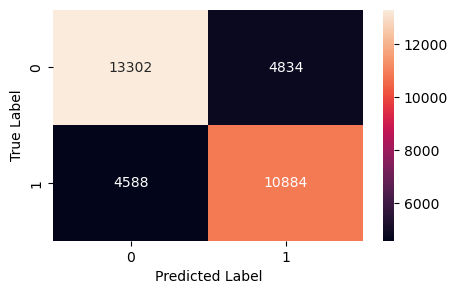

In [90]:
xgb = xgboost(X_train, X_test, y_train, y_test, True)

# AUC-ROC curve

In [84]:
from sklearn.metrics import roc_curve

In [91]:
xgb

array([[0.5714737 , 0.4285263 ],
       [0.5639322 , 0.4360678 ],
       [0.9008424 , 0.09915755],
       ...,
       [0.8409698 , 0.15903023],
       [0.6300608 , 0.3699392 ],
       [0.16016573, 0.8398343 ]], dtype=float32)

In [96]:
rf

array([[0.44, 0.56],
       [0.84, 0.16],
       [0.9 , 0.1 ],
       ...,
       [0.88, 0.12],
       [0.58, 0.42],
       [0.17, 0.83]])

In [97]:
dt

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [98]:
fpr1, tpr1, thresh1 = roc_curve(y_test, xgb[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, rf[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, dt[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

/var/folders/hp/n92g34w508j_9d8zmklf0xjm0000gn/T/ipykernel_32347/770281350.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


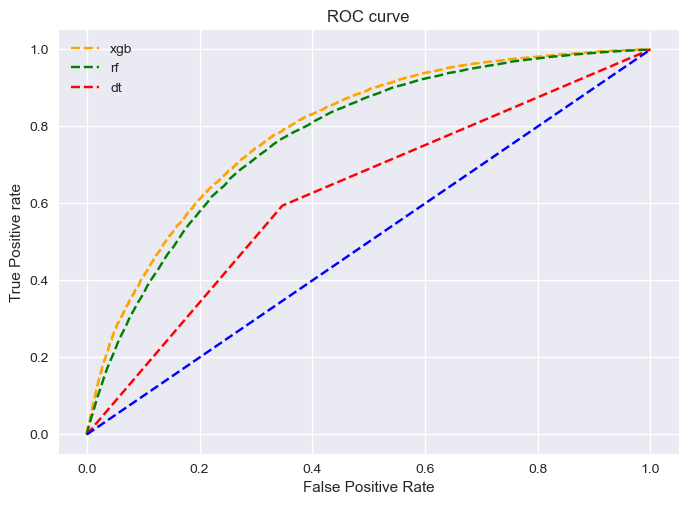

In [99]:
plt.style.use('seaborn')

# plotting the roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='xgb')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='rf')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='dt')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [103]:
print('fpr1',fpr1)
print('tpr1',tpr1)
print('fpr2',fpr2)
print('tpr2',tpr2)
print('fpr3',fpr3)
print('tpr3',tpr3)



fpr1 [0.         0.         0.         ... 0.99536833 0.99536833 1.        ]
tpr1 [0.00000000e+00 6.46328852e-05 2.58531541e-04 ... 9.99935367e-01
 1.00000000e+00 1.00000000e+00]
fpr2 [0.00000000e+00 0.00000000e+00 5.51389502e-05 5.51389502e-05
 1.10277900e-04 1.65416850e-04 1.65416850e-04 4.41111601e-04
 7.71945302e-04 1.04764005e-03 1.10277900e-03 1.59902955e-03
 2.48125276e-03 3.41861491e-03 4.96250551e-03 6.50639612e-03
 8.38112042e-03 8.43625937e-03 1.08072342e-02 1.08072342e-02
 1.31230701e-02 1.58800176e-02 1.58800176e-02 1.89677989e-02
 2.27172475e-02 2.69078077e-02 3.13189237e-02 3.13189237e-02
 3.61711513e-02 3.61711513e-02 4.21261579e-02 4.21812969e-02
 4.81363035e-02 4.81363035e-02 5.40913101e-02 5.40913101e-02
 5.41464491e-02 6.08182620e-02 6.08734010e-02 6.88134098e-02
 7.54852228e-02 7.54852228e-02 7.55403617e-02 8.30392589e-02
 8.30943979e-02 8.30943979e-02 9.09241288e-02 9.09241288e-02
 1.00077195e-01 1.00077195e-01 1.07465814e-01 1.07465814e-01
 1.16343185e-01 1.16343